<a href="https://colab.research.google.com/github/AyozeGS/IABD/blob/main/SNS/UT3/T7/Ayoze_Gil_Sosa_Act_3_7_Richters_Predictor_Modeling_Earthquake_Damage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ayoze Gil Sosa

# Instalación de paquetes

In [ ]:
!pip install lazypredict

# Importación de librerías

In [ ]:
# Librerías para trabajar con ficheros
import joblib
# Librerías para tratamiento y visualización de datos
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Librerías para trabajar con modelos de entranamiento
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import DistanceMetric
from scipy import cluster
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
# Librerías de los modelos a comparar
from lazypredict.Supervised import LazyClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier


# Carga de datos

## Datos de entrenamiento

In [ ]:
# Se intenta cargar primero el fichero csv, y en su defecto se
# intenta descargar el fichero csv del repositorio github.

train_values_csv_path = '/content/train_values.csv'
train_labels_csv_path = '/content/train_labels.csv'
train_values_github_path = 'https://github.com/AyozeGS/IABD/raw/main/SNS/UT3/T7/resources/train_values.csv'
train_labels_github_path = 'https://github.com/AyozeGS/IABD/raw/main/SNS/UT3/T7/resources/train_labels.csv'

# Features
try:
  df_train_features = pd.read_csv(train_values_csv_path, sep=',')
  print("Se ha cargado el fichero de features.")
except:
  try:
    df_train_features = pd.read_csv(train_values_github_path, sep=",")
    print("Se ha cargado el fichero de features.")
  except:
    print("No está disponible el fichero de features.")
# Labels
try:
  df_train_labels = pd.read_csv(train_labels_csv_path, sep=',')
  print("Se ha cargado el fichero de labels.")
except:
  try:
    df_train_labels = pd.read_csv(train_labels_github_path, sep=",")
    print("Se ha cargado el fichero de labels.")
  except:
    print("No está disponible el fichero de labels.")

Se ha cargado el fichero de features.
Se ha cargado el fichero de labels.


In [ ]:
# Unimos los dos datasets con las variables independientes y las etiquetas
df_train = pd.merge(df_train_features, df_train_labels, how='inner', on='building_id')
df_train

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
260596       688636              25            1335            1621   
260597       669485              17             715            2060   
260598       602512              17              51            8163   
260599       151409              26              39            1851   
260600       747594              21               9            9101   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30                6                  5   
1                         2   10                8                  7   
2                         2   10                5                  5   
3                         2   10                6                  5   
4                         3   30                8                  9   
...                     ...  ...              ...                ...   
260596                    1   55                6                  3   
260597                    2    0                6                  5   
260598                    3   55                6                  7   
260599                    2   10               14                  6   
260600                    3   10                7                  6   

       land_surface_condition foundation_type  ... has_secondary_use_hotel  \
0                           t               r  ...                       0   
1                           o               r  ...                       0   
2                           t               r  ...                       0   
3                           t               r  ...                       0   
4                           t               r  ...                       0   
...                       ...             ...  ...                     ...   
260596                      n               r  ...                       0   
260597                      t               r  ...                       0   
260598                      t               r  ...                       0   
260599                      t               r  ...                       0   
260600                      n               r  ...                       0   

       has_secondary_use_rental has_secondary_use_institution  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   
...                         ...                           ...   
260596                        0                             0   
260597                        0                             0   
260598                        0                             0   
260599                        0                             0   
260600                        0                             0   

       has_secondary_use_school has_secondary_use_industry  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   
...                         ...                        ...   
260596                        0                          0   
260597                        0                          0   
260598        

## Datos de test

In [ ]:
# Se intenta cargar primero el fichero csv, y en su defecto se
# intenta descargar el fichero csv del repositorio github.

test_values_csv_path = '/content/test_values.csv'
test_values_github_path = 'https://github.com/AyozeGS/IABD/raw/main/SNS/UT3/T7/resources/test_values.csv'

try:
  df_test_features = pd.read_csv(test_values_csv_path, sep=',')
  display(df_test_features)
except:
  try:
    df_test_features = pd.read_csv(test_values_github_path, sep=",")
    display(df_test_features)
  except:
    print("No está disponible el fichero de features.")

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0           300051              17             596           11307   
1            99355               6             141           11987   
2           890251              22              19           10044   
3           745817              26              39             633   
4           421793              17             289            7970   
...            ...             ...             ...             ...   
86863       310028               4             605            3623   
86864       663567              10            1407           11907   
86865      1049160              22            1136            7712   
86866       442785               6            1041             912   
86867       501372              26              36            6436   

       count_floors_pre_eq  age  area_percentage  height_percentage  \
0                        3   20                7                  6   
1                        2   25               13                  5   
2                        2    5                4                  5   
3                        1    0               19                  3   
4                        3   15                8                  7   
...                    ...  ...              ...                ...   
86863                    3   70               20                  6   
86864                    3   25                6                  7   
86865                    1   50                3                  3   
86866                    2    5                9                  5   
86867                    2   10               11                  4   

      land_surface_condition foundation_type  ...  \
0                          t               r  ...   
1                          t               r  ...   
2                          t               r  ...   
3                          t               r  ...   
4                          t               r  ...   
...                      ...             ...  ...   
86863                      t               r  ...   
86864                      n               r  ...   
86865                      t               r  ...   
86866                      t               r  ...   
86867                      t               r  ...   

      has_secondary_use_agriculture has_secondary_use_hotel  \
0                                 0                       0   
1                                 1                       0   
2                                 0                       0   
3                                 0                       0   
4                                 0                       0   
...                             ...                     ...   
86863                             1                       0   
86864                             0                       0   
86865                             0                       0   
86866                             0                       0   
86867                             0                       0   

      has_secondary_use_rental has_secondary_use_institution  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            1                             0   
4                            0                             0   
...                        ...                           ...   
86863                        0                             0   
86864                        0                             0   
86865                        0                             0   
86866                        0                             0   
86867                        0                             0   

      has_secondary_use_school  has_secondary_use_industry  \
0                            0                           0   
1                         

# Preanálisis del conjunto de datos

1. Se comprueban las diferentes categorías disponibles
2. Se comprueban aquellas filas que contengan valores NaN y null
3. Se realizan comprobaciones específicas para el entendimiento de los datos en las diferentes columnas.

## Se comprueba si los datos están balanceados

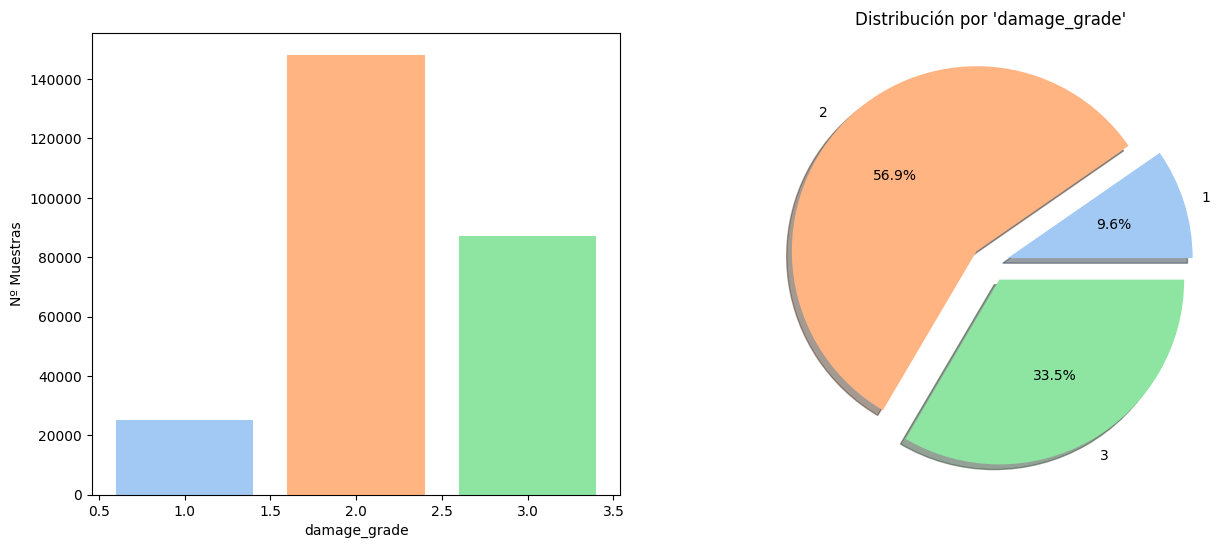

In [ ]:
# Visualización de registros de cada categoría
samples = df_train['damage_grade'].value_counts().sort_index()
porc = df_train['damage_grade'].value_counts(normalize=True).sort_index()

fig, ax = plt.subplots(ncols=2, figsize=(15,6))
palette = sns.color_palette("pastel", len(samples))
ax[0].bar(samples.index, samples.values, color=palette);
ax[0].set_xlabel('damage_grade')
ax[0].set_ylabel('Nº Muestras')

ax[1].pie(porc, labels=porc.index, autopct='%1.1f%%', shadow = True, explode = 0.1*np.ones(len(porc)), colors=palette);
ax[1].set_title("Distribución por 'damage_grade'");

Se puede observar que tenemos un claro desbalanceo de los datos, teniendo aproximadamente un 6 veces más muestras en la clase con más muestras que en aquella con menos muestras. Esto puede conllevar a una mala predicción en las etiquetas con menor número de muestras.

## Tratar filas que contengan valores NaN y null

Se comprueba si hay alguna columna con valores Nan o null para decdir que hacer con ellos en caso de que existan.

In [ ]:
# Comprobación de valores nulos y NaN, máximos y mínimos para cada característica en los dataset de entrenamiento y test
pd.DataFrame({
  "Tipo": [df_train[column].dtype for column in df_train.columns],
  "Train Null ": df_train.isnull().sum(),
  "Test Null": df_test_features.isnull().sum(),
  "Train Nan": df_train.isna().sum(),
  "Test Nan": df_test_features.isna().sum(),
})

Tipo  Train Null   Test Null  \
age                                      int64            0        0.0   
area_percentage                          int64            0        0.0   
building_id                              int64            0        0.0   
count_families                           int64            0        0.0   
count_floors_pre_eq                      int64            0        0.0   
damage_grade                             int64            0        NaN   
foundation_type                          int64            0        0.0   
geo_level_1_id                           int64            0        0.0   
geo_level_2_id                          object            0        0.0   
geo_level_3_id                          object            0        0.0   
ground_floor_type                       object            0        0.0   
has_secondary_use                       object            0        0.0   
has_secondary_use_agriculture           object            0        0.0   
has_secondary_use_gov_office            object            0        0.0   
has_secondary_use_health_post           object            0        0.0   
has_secondary_use_hotel                  int64            0        0.0   
has_secondary_use_industry               int64            0        0.0   
has_secondary_use_institution            int64            0        0.0   
has_secondary_use_other                  int64            0        0.0   
has_secondary_use_rental                 int64            0        0.0   
has_secondary_use_school                 int64            0        0.0   
has_secondary_use_use_police             int64            0        0.0   
has_superstructure_adobe_mud             int64            0        0.0   
has_superstructure_bamboo                int64            0        0.0   
has_superstructure_cement_mortar_brick   int64            0        0.0   
has_superstructure_cement_mortar_stone   int64            0        0.0   
has_superstructure_mud_mortar_brick     object            0        0.0   
has_superstructure_mud_mortar_stone      int64            0        0.0   
has_superstructure_other                 int64            0        0.0   
has_superstructure_rc_engineered         int64            0        0.0   
has_superstructure_rc_non_engineered     int64            0        0.0   
has_superstructure_stone_flag            int64            0        0.0   
has_superstructure_timber                int64            0        0.0   
height_percentage                        int64            0        0.0   
land_surface_condition                   int64            0        0.0   
legal_ownership_status                   int64            0        0.0   
other_floor_type                         int64            0        0.0   
plan_configuration                       int64            0        0.0   
position                                 int64            0        0.0   
roof_type                                int64            0        0.0   

                                        Train Nan  Test Nan  
age                                             0       0.0  
area_percentage                                 0       0.0  
building_id                                     0       0.0  
count_families                                  0       0.0  
count_floors_pre_eq                             0       0.0  
damage_grade                                    0       NaN  
foundation_type                                 0       0.0  
geo_level_1_id                                  0       0.0  
geo_level_2_id                                  0       0.0  
geo_level_3_id                                  0       0.0  
ground_floor_type                               0       0.0  
has_secondary_use                               0       0.0  
has_secondary_use_agriculture                   0       0.0  
has_secondary_use_gov_office                    0       0.0  
has_secondary_use_health_post                   0       0.0  
has_secondary_u

## Comprobaciones previas específicas para el dominio del problema

### Variables Numéricas

Comprobamos los rangos de valores de las columnas numéricas en los datos de entrenamiento y test para comprobar si son similares

Observamos que no existe un rango de valores en las muestras de entrenamientos que sean descartables para el estudio y propuestos para eliminar dichos registros.

In [ ]:
# Comprobación máximos y mínimos para cada característica no binarias en los dataset de entrenamiento y test
df_numeric_cols = df_train_features.select_dtypes(include=['number'])
df_numeric_cols = df_numeric_cols.loc[:, df_numeric_cols.nunique() > 2]
numeric_cols = df_numeric_cols.columns

pd.DataFrame({
  "Train Min": df_numeric_cols.min(),
  "Test Min": [df_test_features[column].min() for column in numeric_cols],
  "Train Max": df_numeric_cols.max(),
  "Test Max": [df_test_features[column].max() for column in numeric_cols]
})

Train Min  Test Min  Train Max  Test Max
building_id                  4         7    1052934   1052923
geo_level_1_id               0         0         30        30
geo_level_2_id               0         0       1427      1427
geo_level_3_id               0         0      12567     12567
count_floors_pre_eq          1         1          9         8
age                          0         0        995       995
area_percentage              1         1        100        92
height_percentage            2         2         32        32
count_families               0         0          9         8

### Identificador ID

Comprobamos que el id del edificio por el que hemos unido las tablas no guarda ninguna relación con el riesgo de derrumbamiento. Con ello podemos observar que la enumeración de los edificios es totalmente ajena y no guarda relación con el grado de daño de los mismos y es irrelevante para la predicción.

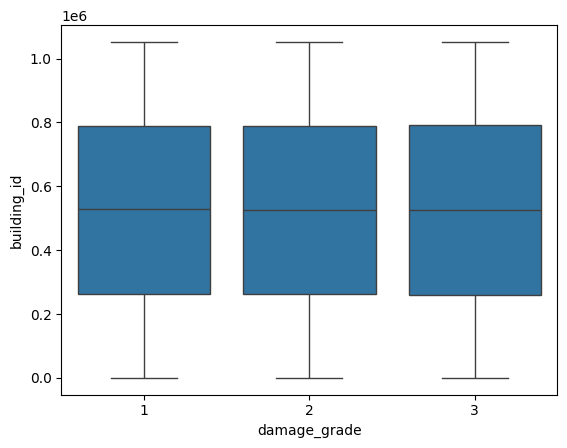

In [ ]:
sns.boxplot(df_train, y="building_id", x="damage_grade");

### Niveles administrativos

Comprobamos que no existen ids de nivel 2 con el mismo número en diferentes ids de nivel 1. Y lo mismo con las ids de nivel 3 y nivel 2. Con ello nos asegurameos de que podemos seleccionar sólo 1 de las columnas según la escala de las áreas a tener en cuenta para el análisis.

In [ ]:
df_train.iloc[:, 1:3].groupby('geo_level_2_id').nunique().value_counts()

geo_level_1_id
1                 1414
Name: count, dtype: int64

In [ ]:
df_train.iloc[:, 2:4].groupby('geo_level_3_id').nunique().value_counts()

geo_level_2_id
1                 11595
Name: count, dtype: int64

Comprobado que un mismo valor de nivel 3 implica un mismo valor de nivel 1 y 2 podemos concluir que nos bastará con una de las columnas.

Además, como el nivel 3 tiene demasiadas categorías y se puede comprobar que no guarda correlación con el riesgo de derrumbamiento, es una columna que no será útil en el análisis.

Aprovechando este análisis, hacemos los mismo para los otros dos niveles, comprobando que para el nivel 2 la distribución es similar, siendo una columna también descartable de inicio.

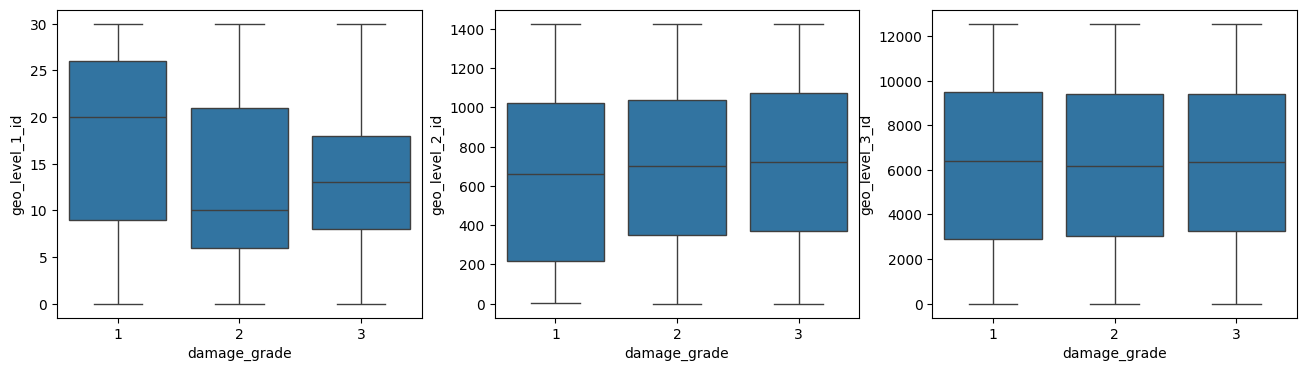

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(16,4))

sns.boxplot(df_train, y="geo_level_1_id", x="damage_grade", ax=ax[0]);
sns.boxplot(df_train, y="geo_level_2_id", x="damage_grade", ax=ax[1]);
sns.boxplot(df_train, y="geo_level_3_id", x="damage_grade", ax=ax[2]);

### Otras variables numéricas

Observando el resto de variables numéricos apreciamos un gran número de outliers, o mejor dicho, debido un distribución muy concentrado en un rango de valores muy bajo deentro de vaores concretos.

En cualquier caso, hemos visto que el rango es idéntico en el test, por lo que no es recomendable eliminar estos outliers si en el dataset de test vamos a predecir esos registros igualmente. Dependerá por tanto de si eliminamos o no las columnas.

Hay dos gráficas en concreto que llaman la atención.

- La primera es la edad del edificio, pues existe un salto de aproximadamente 200 años a 995.
- La segunda es la del número de familias pues se concetra mayormente en el valor 1 y el resto de valores no aseguran el grado del daño.

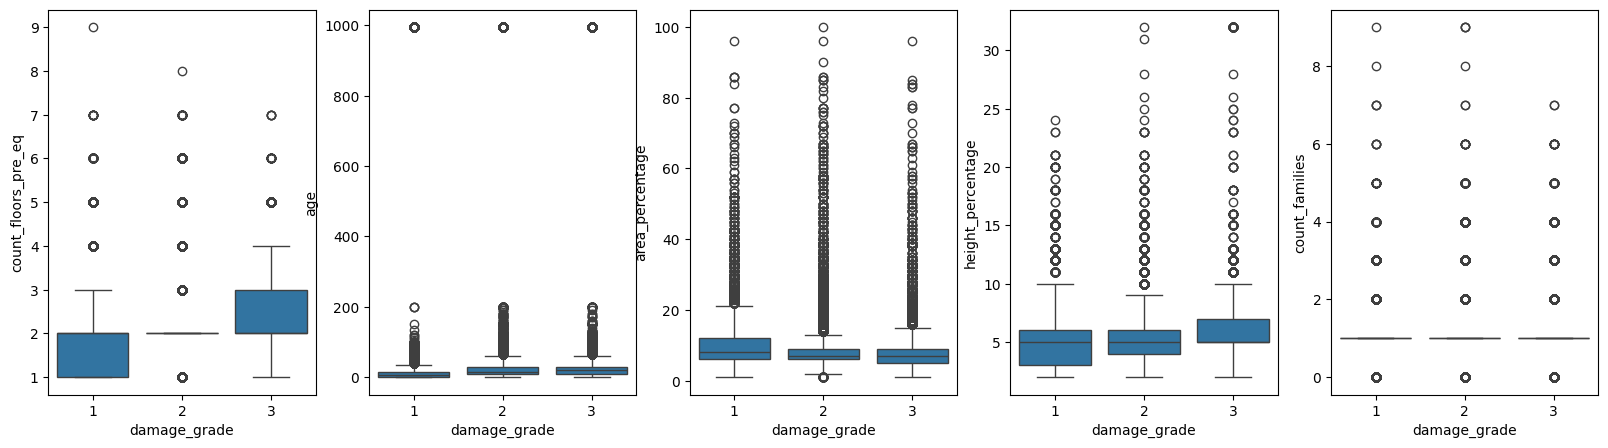

In [ ]:
fig, ax = plt.subplots(1,5, figsize=(20,5))
for idx, column in enumerate(numeric_cols[4:]):

  # Dibujar un gráfico de cajas
  sns.boxplot(df_train, y=column, x="damage_grade", ax=ax[idx]);

Complementando con un gráfico de barras vemos que la distribución de la edad puede ayudarnos a predecir el daño en algún caso, pero es interesante unir todos aquellos edificios por encima de cierto valor que se aproxime más a la distribución. Por ejemplo 105 para todos los edificios que superen los 100 años.

Respecto al número de familias, no se observa que sea una variable que ayude a determinar el grado de daño, por lo que también se descartará de inicio.

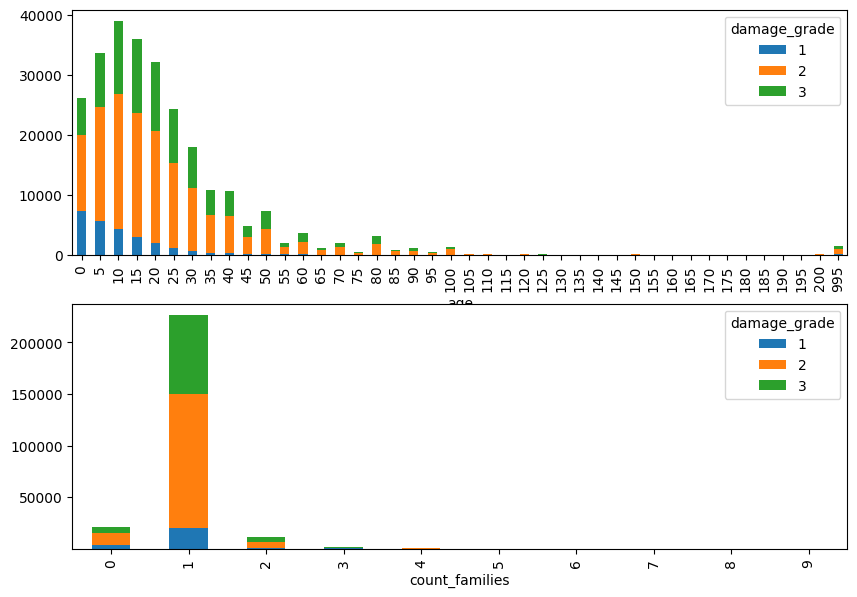

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(10,7))
for idx, column in enumerate(['age', 'count_families']):

  # Agrupar por la columna categórica y 'damage_grade', luego contar
  grouped = df_train.groupby([column, 'damage_grade']).size().unstack(fill_value=0)
  # Dibujar un gráfico de barras apiladas
  grouped.plot(kind='bar', stacked=True, ax=ax[idx])

### Variables categóricas

Comprobamos los distintos valores categóricos para cada categoría en train y test para observar si mantienen un proporción entre sus distintos valores para cada columna.

De nuevo observamos que las distribuciones máximas y mínimas son idénticas y que la separación de valores de entrenamiento y test y respetado las proporciones de cada columna.

In [ ]:
#Variables categóricas
df_categorical_cols = df_train_features.select_dtypes(include=['object'])
categorical_cols = df_categorical_cols.columns

pd.DataFrame({
  "Train Categories": df_categorical_cols.nunique(),
  "Test Categories": [df_test_features[column].nunique() for column in categorical_cols],
  "Train More samples Category": [df_categorical_cols[column].value_counts(normalize=True).max() for column in categorical_cols],
  "Test More samples Category": [df_test_features[column].value_counts(normalize=True).max() for column in categorical_cols],
  "Train Less samples Category": [df_categorical_cols[column].value_counts(normalize=True).min() for column in categorical_cols],
  "Test Less samples Category": [df_test_features[column].value_counts(normalize=True).min() for column in categorical_cols],
})

Train Categories  Test Categories  \
land_surface_condition                 3                3   
foundation_type                        5                5   
roof_type                              3                3   
ground_floor_type                      5                5   
other_floor_type                       4                4   
position                               4                4   
plan_configuration                    10               10   
legal_ownership_status                 4                4   

                        Train More samples Category  \
land_surface_condition                         0.83   
foundation_type                                0.84   
roof_type                                      0.70   
ground_floor_type                              0.80   
other_floor_type                               0.63   
position                                       0.78   
plan_configuration                             0.96   
legal_ownership_status                         0.96   

                        Test More samples Category  \
land_surface_condition                        0.83   
foundation_type                               0.84   
roof_type                                     0.70   
ground_floor_type                             0.81   
other_floor_type                              0.63   
position                                      0.78   
plan_configuration                            0.96   
legal_ownership_status                        0.96   

                        Train Less samples Category  \
land_surface_condition                         0.03   
foundation_type                                0.01   
roof_type                                      0.06   
ground_floor_type                              0.00   
other_floor_type                               0.05   
position                                       0.01   
plan_configuration                             0.00   
legal_ownership_status                         0.01   

                        Test Less samples Category  
land_surface_condition                        0.03  
foundation_type                               0.01  
roof_type                                     0.06  
ground_floor_type                             0.00  
other_floor_type                              0.05  
position                                      0.01  
plan_configuration                            0.00  
legal_ownership_status                        0.01

Concretando en la gráfica anterior, se puede apreciar que estas columnas no tienen las categorías balanceadas, alcanzando en dos casos un 95% en la clase mayoritario. Estas dos columnas además no tienen que ver con características físicas del edifico, por lo que se puede considerar que son descartables de inicio.  

In [ ]:
for idx, _ in enumerate([df_categorical_cols[column].value_counts(normalize=True) for column in categorical_cols]):
  display(pd.DataFrame(_).T)

land_surface_condition         t         n         o
proportion              0.831758  0.136331  0.031911

foundation_type         r         w        u         i         h
proportion       0.841117  0.058012  0.05472  0.040595  0.005556

roof_type          n         q         x
proportion  0.701617  0.236285  0.062099

ground_floor_type         f        x        v         z         m
proportion         0.804368  0.09546  0.09437  0.003853  0.001949

other_floor_type         q         x         j         s
proportion        0.634234  0.166722  0.152889  0.046155

position           s         t         j         o
proportion  0.775477  0.164604  0.050967  0.008952

plan_configuration         d         q         u         s         c  \
proportion          0.959597  0.021842  0.014002  0.001328  0.001247   

plan_configuration         a        o         m         n         f  
proportion          0.000967  0.00061  0.000177  0.000146  0.000084

legal_ownership_status         v         a         w         r
proportion              0.962924  0.021151  0.010272  0.005652

Usando gráficos de barras apiladas podemos observarlo mejor y terminar de decidir.

Efecetivamente, podemos concluir que las dos últimas columnas no nos van a aportar ninguna información de utilidad para la predicción, por lo que se pueden eliminar incialmente.

Respecto al resto, podría valorarse la posibilidad de agrupar las variables minoritarias como una sóla, de modo que se conviertan en valores categóricos binarios, pero como se observa diferente distribución del grado de daño en alguno de las categorías para una misma variable en varias de las columnas se dejarán como están

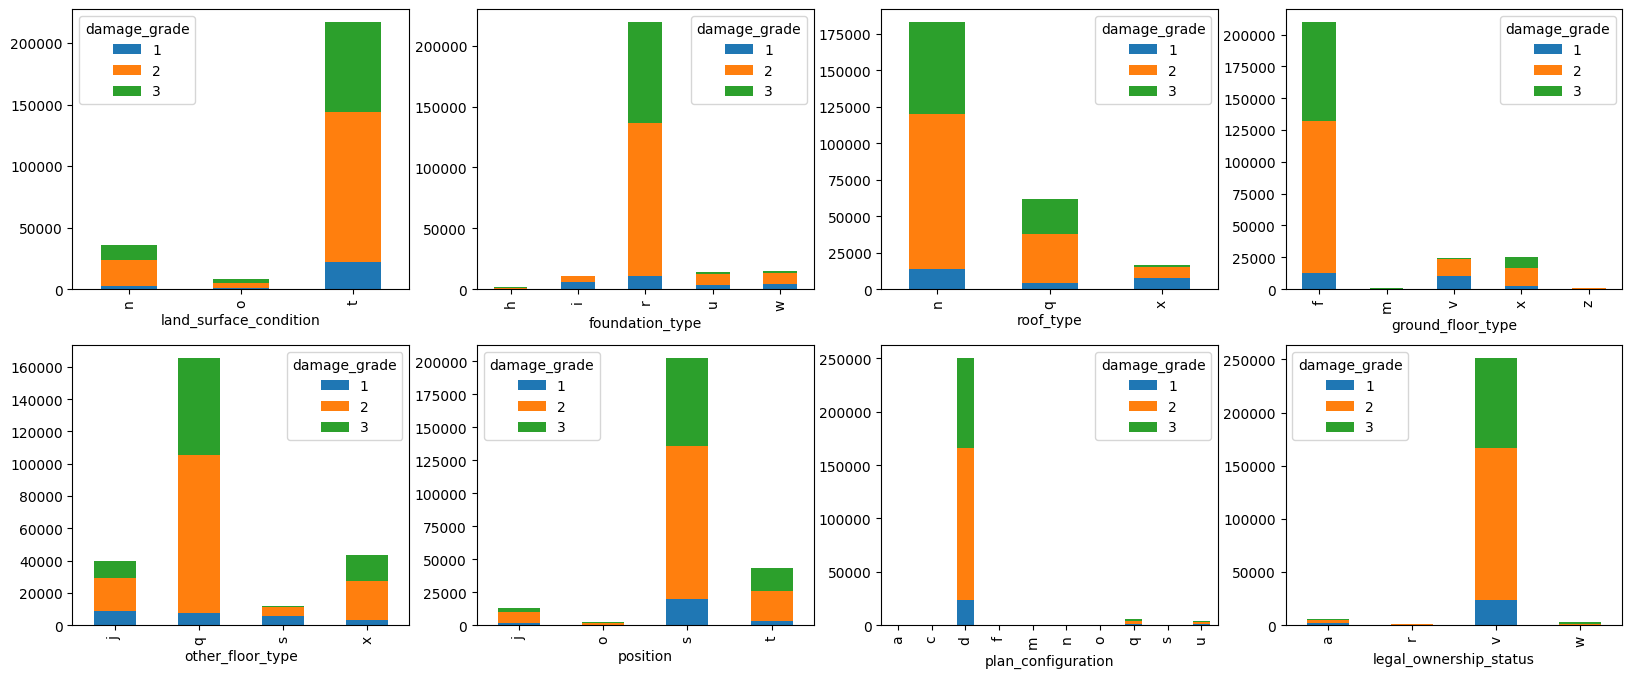

In [ ]:
fig, ax = plt.subplots(2,4, figsize=(20,8))
for idx, column in enumerate(categorical_cols):

  # Agrupar por la columna categórica y 'damage_grade', luego contar
  grouped = df_train.groupby([column, 'damage_grade']).size().unstack(fill_value=0)
  # Dibujar un gráfico de barras apiladas
  grouped.plot(kind='bar', stacked=True, ax=ax[idx//4][idx%4])

Si desapilamos las barras podemos observar las vemos que en casos como "foundation_type", "roof_type", "ground_floor_type" u "other_floor_type" las variables minoritarios tienen una proporción distinta en los valores del grado del daño. Por lo que no es interesenta unificarlos.

Sin embargo, observamos que la proporción en "land_surface_condition" y "position" es similar independiente de su categoría. Por la tanto son variables que es interesenate descartar también antes de proseguir con el análisis.

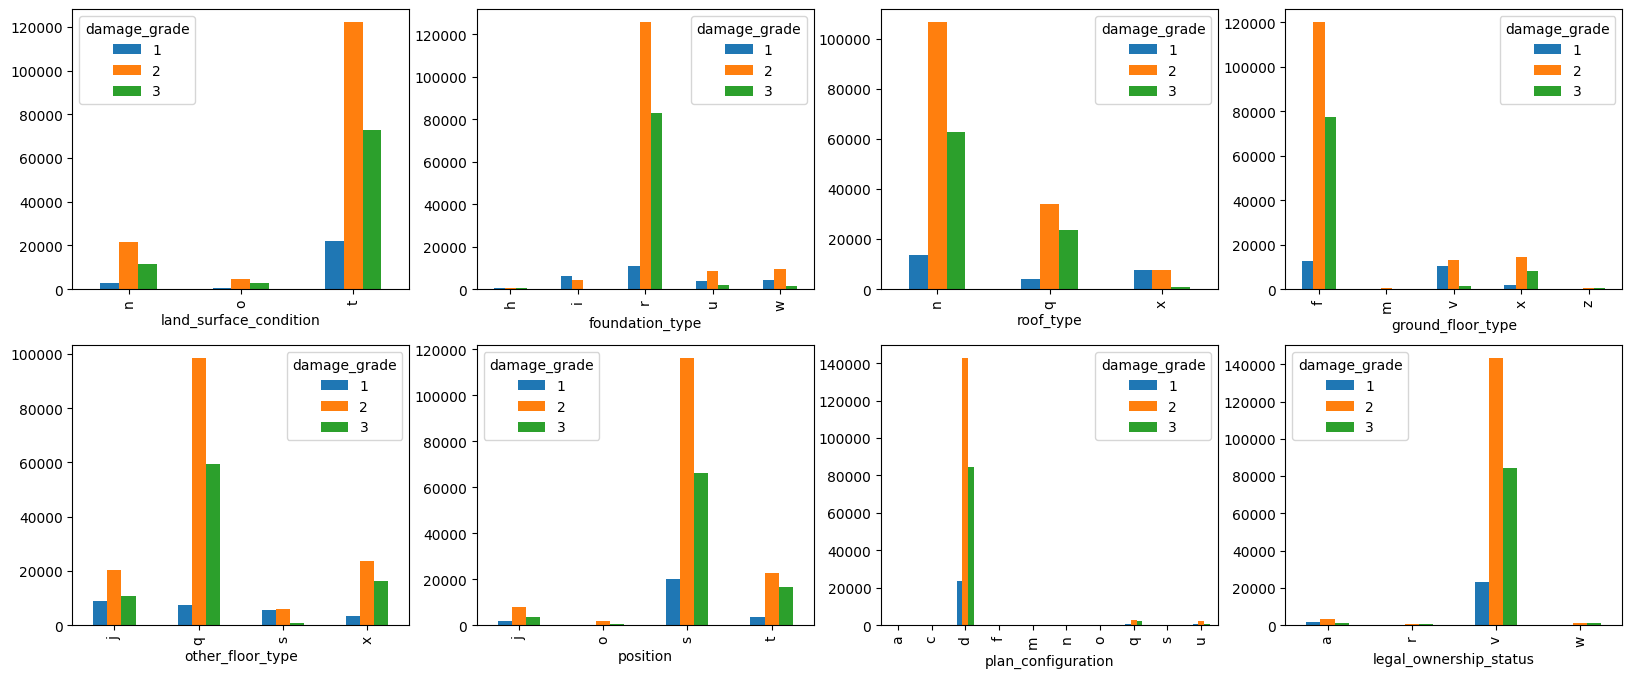

In [ ]:
fig, ax = plt.subplots(2,4, figsize=(20,8))
for idx, column in enumerate(categorical_cols):

  # Agrupar por la columna categórica y 'damage_grade', luego contar
  grouped = df_train.groupby([column, 'damage_grade']).size().unstack(fill_value=0)
  # Dibujar un gráfico de barras apiladas
  grouped.plot(kind='bar', stacked=False, ax=ax[idx//4][idx%4])

### Variables binarias de estructura

Comprobamos que las 11 columnas de los materiales de la estructura son independientes contando el número de materiales que están presentes en cada regsitro y comprobando a su vez que la estructura está hecho al menos de un material.

Efectivamente vemos que los edificios están fabricados con uno o más materiales diferentes. Por ello no es planteable unificar dichas columnas en una única variable categórica ni reducir el número de estas columnas de forma previa al procesamiento.

In [ ]:
for column in df_train.iloc[:, 15:26].columns:
  print(column)

has_superstructure_adobe_mud
has_superstructure_mud_mortar_stone
has_superstructure_stone_flag
has_superstructure_cement_mortar_stone
has_superstructure_mud_mortar_brick
has_superstructure_cement_mortar_brick
has_superstructure_timber
has_superstructure_bamboo
has_superstructure_rc_non_engineered
has_superstructure_rc_engineered
has_superstructure_other


In [ ]:
df_train.iloc[:, 15:26].sum(axis=1).value_counts()

1    176016
2     57838
3     20210
4      4925
5      1259
6       314
7        35
8         4
Name: count, dtype: int64

### Variables binarias de uso

Por último, se comprueba la coherencia en las columnas de uso secundario por si hubiera columnas que no indiquen el uso secundario simultáneamente en la columna genérica y en al menos uno de las particulares. Además se comprueba que dichas columnas de uso particular son independientes y pueden haber más de una simultáneamente.

Con esto, no se observa ninguna irregularidad que nos haga plantear descartar cualquiera de dichas columnas de forma anticipada antes del procesamiento.

In [ ]:
# La onceava columna empezando por el final indica si el edificio tiene algún tipo de uso secundario.
_ = len(df_train[df_train.loc[:, 'has_secondary_use'] == 1])
print("Edificios con algún uso secundario:", _)
# Las 10 últimas columnas coinciden con aquellas que indican si el edificio tiene uso secundario concreto
_ = len(df_train[df_train.iloc[:, -10:].sum(axis=1) == 1])
print("Edificios con sólo un uso secundario:", _)
_ = len(df_train[df_train.iloc[:, -10:].sum(axis=1) > 1])
print("Edificios más de un uso secundario:", _)
#Comprobamos si las filas con algún uso secundario se corresponden en la columna genérica y alguna de las particulares
print("-"*50)
_ = len(df_train[(df_train.iloc[:, -10:].sum(axis=1) > 0) & (df_train.loc[:, 'has_secondary_use'] == 1)])
print("Edificios con correspondencia entre uso secundario y el tipo de uso:", _)
_ = len(df_train[(df_train.iloc[:, -10:].sum(axis=1) > 0) & (df_train.loc[:, 'has_secondary_use'] == 0)])
print("Edificios sin correspondencia en uso secundario con el tipo de uso:", _)

Edificios con algún uso secundario: 29156
Edificios con sólo un uso secundario: 21661
Edificios más de un uso secundario: 238940
--------------------------------------------------
Edificios con correspondencia entre uso secundario y el tipo de uso: 29156
Edificios sin correspondencia en uso secundario con el tipo de uso: 231445


# Procesamiento del conjunto de datos

1. Se eliminan las columnas seleccionadas
2. Se eliminan o transforman aquellas filas que contengan valores NaN y null
3. Se modifica la columna de edad
4. Se eliminan las filas seleccionadas
5. Se transforman (a valores categóricos) o eliminan las columnas no numéricas
6. Se escalan las columnas seleccionadas

Inicialmente vamos a indicar las columnas que queremos transformar. En este caso vamos a pasar todos las columnas no numéricas a valores numéricos categóricos.

Además, vamos a eliminar las columnas de building_id y geo_level_3_id, dado que hemos visto que no guardan correlación con la variable dependiente y el número de valores distintos es muy elevado si lo comparamos con el conjunto de muestras que usaremos para entrenar.

Finalmente se van a escalar todas las columnas numéricas no binarias y las categóricas (y a transformadas a númericas) con la técnica de MinMax.

In [ ]:
# Conjunto de datos y campo a predecir
df = df_train.copy()
df_test = df_test_features.copy()
target_field = "damage_grade"
target_categories = df[target_field].unique()
target_categories = np.sort(target_categories)

# Se indica si se transformarán las columnas con datos no númericos a valores categóricos een en el preprocesado
all_columns_to_categorical = True
target_field_to_categorical = False

# Columnas a eliminar
# Nota: Se eliminan las columnas no numéricas automáticamente a excepción del target
columns_to_discard = ['building_id', 'plan_configuration', 'legal_ownership_status',
                      'geo_level_2_id', 'geo_level_3_id', 'count_families', 'land_surface_condition', 'position']

#Colummas numéricas no binarias
df_numeric_cols = df_train_features.select_dtypes(include=['number'])
df_numeric_cols = df_numeric_cols.loc[:, df_numeric_cols.nunique() > 2]
numeric_cols = df_numeric_cols.columns

# Columnas categóricas
df_categorical_cols = df_train_features.select_dtypes(include=['object'])
categorical_cols = df_categorical_cols.columns

# Columnas a escalar
columns_to_minmax_scale = list(numeric_cols) + list(categorical_cols)
columns_to_minmax_scale = [column for column in columns_to_minmax_scale if column not in columns_to_discard]
columns_to_standard_scale = []
#Nota: Algunos modelos como ComplementNB, MultinomialNB y CategoricalNB no admiten valores negativos

## Se eliminan las columnas seleccionadas

In [ ]:
# Se eliminan las columnas seleccionadas
print("Columnas antes:", df.columns.size)
for column in columns_to_discard:
  del df[column]
  # Se aprovecha para eliminarlas del conjunto de test
  del df_test[column]
  if column in categorical_cols:
    categorical_cols = categorical_cols.drop(column)
  if column in numeric_cols:
    numeric_cols = numeric_cols.drop(column)
print("Columnas después:", df.columns.size)

Columnas antes: 40
Columnas después: 32


## Se eliminan aquellas filas que contengan valores NaN y null

En este caso no disponemos de filas con valores nulos, así que no necesitamos eliminar dichas filas.

In [ ]:
# Eliminación de filas con valores NaN y reajuste de los indices
rows_before = df[target_field].value_counts()
df.dropna(inplace=True)
df.index = range(df.shape[0])
rows_after = df[target_field].value_counts()

# Visualización de registros de cada categoría
display(pd.DataFrame(pd.concat([rows_before, rows_after], axis=1, keys=["before", "after"])))
print(f"\n{rows_before.sum() - df.shape[0]} rows deleted\n")

before   after
damage_grade                
2             148259  148259
3              87218   87218
1              25124   25124


0 rows deleted



## Modificación de la edad 995

Para este ejercicio concreto hemos determinado anteriormente que aquellos edificios con más de 100 años deberían tener el mismo valor, más acorde con la distribución presentada que el valor de 995.

Por ello editaremos este valor tanto en el dataset de entrenamiento como en el de test comprobando que en ambos casos la proporción es muy parecida.

In [ ]:
print(f"Edificios de +100 años en train: {len(df[df['age']> 100])} ({round(100*len(df[df['age']> 100])/len(df),2)}%)")
print(f"Edificios de +100 años en train: {len(df_test[df_test['age']> 100])} ({round(100*len(df_test[df_test['age']> 100])/len(df_test),2)}%)")

Edificios de +100 años en train: 2124 (0.82%)
Edificios de +100 años en train: 712 (0.82%)


In [ ]:
df.loc[df['age'] > 100, 'age'] = 101
# Aplicamos también los cambios en el dataset de test
df_test.loc[df_test['age'] > 100, 'age'] = 101
print("Edificios, con más 100 años tras editar la columna:", len(df[df['age']> 100]), ",", len(df_test[df_test['age']> 100]))
print("Edificios, con más 101 años tras editar la columna:", len(df[df['age']> 101]), ",", len(df_test[df_test['age']> 101]))

Edificios, con más 100 años tras editar la columna: 2124 , 712
Edificios, con más 101 años tras editar la columna: 0 , 0


## Se eliminan las filas seleccionadas

Como se indica en el enunciado, el número de filas es muy elevado y se hace necesario realizar una selección de un conjunto de ellas siguiendo la técnica que se considera adecuada. Pero, tras las comprobaciones hechas para las columnas anteriores, no se ha observado ninguna irregularidad en la columnas de las variables independientes que nos lleve a eliminar registros en base a cualquiera de ellas.

Para reducir el número de filas que nos permita trabajar con el dataset sin problemas de rendimiento, vamos a eliminar en primer lugar el número de registros duplicados.

Para ello vamos a hacer algunas comprobaciones. Si con el dataset original comparamos el número de filas que quedan al eliminar duplicados considerando la variable dependiente por la que se etiquetan las muestras, con el número de filas al no contemplar dicha etiqueta para eliminar los duplicados tenemos estas conclusiones:

* Existen registros con los mismos valores etiquetados con diferentes valores de grado de daño. Si bien hay unos 12.000 registros eliminados diferenciando etiquetas, se pasa a casi 16.000 si no las tenemos en cuenta. Eso hace más de 30.000 registros que se clasifican con distinto grado de daño ante los mismos valores.

* Independientemente de la forma de eliminar los duplicados, la proporción se mantiene similar. Es un buen indicativo de que la eliminación de filas de esta forma es una buena estrategia.

In [ ]:
# Comprobación en la eliminación de duplicados sin eliminar las columnas (a excepción del id por razones obvias)
rows_before = df_train[target_field].value_counts()
len_before = len(df_train)
# Filas sin duplicados teniendo en cuenta la variable dependiente
rows_uniques = df_train.drop(['building_id'],axis=1).drop_duplicates()[target_field].value_counts()
len_uniques = len(df_train.drop(['building_id'],axis=1).drop_duplicates())
# Filas sin duplicados ignorando la variable dependiente manteniendo 1 registro por cada combinación duplicada
rows_unduplicated_keeping = df_train.iloc[df_train.drop([target_field, 'building_id'],axis=1).drop_duplicates().index][target_field].value_counts()
len_unduplicated_keeping = len(df_train.drop([target_field, 'building_id'],axis=1).drop_duplicates())
# Filas sin duplicados ignorando la variable dependiente y sin mantener registros duplicados
rows_unduplicated_deleting = df_train.iloc[df_train.drop([target_field, 'building_id'],axis=1).drop_duplicates(keep=False).index][target_field].value_counts()
len_unduplicated_deleting = len(df_train.drop([target_field, 'building_id'],axis=1).drop_duplicates(keep=False))

# Visualización de registros de cada categoría
_ = pd.DataFrame(pd.concat([rows_before, rows_before/len_before,
                                rows_uniques, rows_uniques/len_uniques,
                                rows_unduplicated_keeping, rows_unduplicated_keeping/len_unduplicated_keeping,
                                rows_unduplicated_deleting, rows_unduplicated_deleting/len_unduplicated_deleting], axis=1,
                               keys=["before", "%",
                                     "unique with label", "%",
                                     "unique keeping one duplicated", "%",
                                     "unique droping all duplicated", "%"]))
idx = list(_.index)
_ = pd.concat([_, _.sum().to_frame().T])
_.index = idx + ["Total"]
display(_)

before    %  unique with label    %  unique keeping one duplicated  \
2     148259.00 0.57          141506.00 0.57                      139681.00   
3      87218.00 0.33           82346.00 0.33                       80721.00   
1      25124.00 0.10           24430.00 0.10                       24008.00   
Total 260601.00 1.00          248282.00 1.00                      244410.00   

         %  unique droping all duplicated    %  
2     0.57                      132974.00 0.57  
3     0.33                       75931.00 0.33  
1     0.10                       23152.00 0.10  
Total 1.00                      232057.00 1.00

Antes de proceder hacemos la misma operación teniendo en cuenta los cambios ya realizados de modificar la edad de los edificios y eliminar algunas columnas. Con ello observamos que se logra eliminar una mayor cantidad de registros y sin que las distribuciones se distorsionen demasiado.

Es más, puede que hallamos eliminado sesgos de diferentes zonas administrativas dando diferentes puntuaciones baja las mismas variables una que hubiera una distribución distinta de muestras debida a diferentes densidad de población en ellas.

In [ ]:
# Comprobación en la eliminación de duplicados al eliminar las columnas

rows_before = df[target_field].value_counts()
len_before = len(df)
# Filas sin duplicados teniendo en cuenta la variable dependiente
rows_uniques = df.drop_duplicates()[target_field].value_counts()
len_uniques = len(df.drop_duplicates())
# Filas sin duplicados ignorando la variable dependiente manteniendo 1 registro por cada combinación duplicada
rows_unduplicated_keeping = df.iloc[df.drop([target_field],axis=1).drop_duplicates().index][target_field].value_counts()
len_unduplicated_keeping = len(df.drop([target_field],axis=1).drop_duplicates())
# Filas sin duplicados ignorando la variable dependiente y sin mantener registros duplicados
rows_unduplicated_deleting = df.iloc[df.drop([target_field],axis=1).drop_duplicates(keep=False).index][target_field].value_counts()
len_unduplicated_deleting = len(df.drop([target_field],axis=1).drop_duplicates(keep=False))

# Visualización de registros de cada categoría
_ = pd.DataFrame(pd.concat([rows_before, rows_before/len_before,
                                rows_uniques, rows_uniques/len_uniques,
                                rows_unduplicated_keeping, rows_unduplicated_keeping/len_unduplicated_keeping,
                                rows_unduplicated_deleting, rows_unduplicated_deleting/len_unduplicated_deleting], axis=1,
                               keys=["before", "%",
                                     "unique with label", "%",
                                     "unique keeping one duplicated", "%",
                                     "unique droping all duplicated", "%"]))
idx = list(_.index)
_ = pd.concat([_, _.sum().to_frame().T])
_.index = idx + ["Total"]
display(_)

before    %  unique with label    %  unique keeping one duplicated  \
2     148259.00 0.57           98418.00 0.57                       89869.00   
3      87218.00 0.33           54299.00 0.31                       46075.00   
1      25124.00 0.10           20888.00 0.12                       17806.00   
Total 260601.00 1.00          173605.00 1.00                      153750.00   

         %  unique droping all duplicated    %  
2     0.58                       70437.00 0.59  
3     0.30                       34055.00 0.29  
1     0.12                       14867.00 0.12  
Total 1.00                      119359.00 1.00

En base a los resultados, y considerando que si las mismas variables han sido etiquetadas con dos valores distintos, no nos interesa quedarnos con ninguna para evitar clasificaciones arbitrarias.

Por otro lado, es aceptable eliminar 140.000 muestras manteniendo una distribución similar entre las distintas categorías y sin considerar clasificaciones arbitrarias de quedarnos con duplicados al azar.

In [ ]:
rows_before = df.shape[0]
df = df.iloc[df.drop([target_field],axis=1).drop_duplicates(keep=False).index]
df.reset_index(drop=True)
print(f"\n{rows_before - df.shape[0]} rows deleted\n")


141242 rows deleted







Para completar la selección de filas, se ha decidido como segunda técnica balancear el problema para tener las mismas muestras para cada valor de la variable dependiente.

Además se pretende que también haya balanceo entre las distintas zonas geográficas de la columnas "geo_level_1_id", para cubrir tanto la importancia que pueda tener la distancia a los orígenes del terremoto como los las pequeñas diferencias en criterios de clasificación que pueda haber entre zonas.

In [ ]:
#Muestras por cada combinación de localización de nivel 1 y grado del daño
display(df[['geo_level_1_id', 'damage_grade']].value_counts())
df[['geo_level_1_id', 'damage_grade']].value_counts().describe()

geo_level_1_id  damage_grade
6               2               6760
26              2               6612
20              2               5881
17              3               5577
7               2               4822
                                ... 
2               1                 50
23              1                 47
19              1                 31
29              3                 16
                1                  7
Name: count, Length: 92, dtype: int64

count     92.00
mean    1297.38
std     1611.52
min        7.00
25%      204.50
50%      489.00
75%     1824.00
max     6760.00
Name: count, dtype: float64


Observando las estadísticas vemos que no existe una distribución igualitaria entre estas zonas, por lo que siempre que sea posible cogeremos un máximo de muestras igual al del primer cuartil.

In [ ]:
# Cálculo del primer cuartil
q1 = int(df[['geo_level_1_id', 'damage_grade']].value_counts().quantile(0.25))

rows_before = df['geo_level_1_id'].value_counts()

# Filtramos cada grupo y cogemos una muestra de registros de tamaño máximo el obtenido por el cuartil q1
temp_df = pd.DataFrame([])
for geo_level in df['geo_level_1_id'].unique():
  for damage in df['damage_grade'].unique():
    _ = df.loc[(df['damage_grade'] == damage) & (df['geo_level_1_id'] == geo_level)]
    temp_df = pd.concat([temp_df, _.sample(min(q1, len(_)))])

df = temp_df.sort_index().reset_index(drop=True)
df

geo_level_1_id  count_floors_pre_eq  age  area_percentage  \
0                   9                    2   25                3   
1                   7                    1    5               11   
2                  11                    2   50               10   
3                  26                    1    0               37   
4                  18                    3   15                9   
...               ...                  ...  ...              ...   
16538              26                    1   30                8   
16539              10                    3   15                9   
16540              18                    2    5               11   
16541               6                    2   45               17   
16542              20                    1   25                5   

       height_percentage foundation_type roof_type ground_floor_type  \
0                      4               r         n                 x   
1                      3               i         x                 v   
2                      7               r         q                 f   
3                      3               r         x                 v   
4                      7               r         n                 f   
...                  ...             ...       ...               ...   
16538                  5               r         q                 f   
16539                  6               r         n                 f   
16540                  5               r         n                 f   
16541                  5               r         n                 f   
16542                  3               r         n                 f   

      other_floor_type  has_superstructure_adobe_mud  ...  \
0                    q                             0  ...   
1                    j                             0  ...   
2                    x                             1  ...   
3                    j                             0  ...   
4                    q                             0  ...   
...                ...                           ...  ...   
16538                j                             0  ...   
16539                q                             0  ...   
16540                x                             0  ...   
16541                x                             0  ...   
16542                j                             0  ...   

       has_secondary_use_hotel  has_secondary_use_rental  \
0                            0                         0   
1                            0                         1   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
16538                        0                         0   
16539                        0                         0   
16540                        0                         0   
16541                        0                         0   
16542                        0                         0   

       has_secondary_use_institution  has_secondary_use_school  \
0                                  0                         0   
1                                  0                         0   
2                                  0                         0   
3                                  0                         0   
4                                  0                         0   
...                              ...                       ...   
16538                              0                         0   
16539                              0                         0   
16540                              0                         0   
16541                              0                         0   
16542                              0                         0   

       has_secondary_use_industry  has_secondary_use_health_post  \
0         

Observamos ahora, la distribución de cada par d evalores con respecto antes

In [ ]:
#Muestras por cada combinación de localización de nivel 1 y grado del daño
display(df[['geo_level_1_id', 'damage_grade']].value_counts())
df[['geo_level_1_id', 'damage_grade']].value_counts().describe()

geo_level_1_id  damage_grade
0               1               204
21              1               204
20              2               204
                1               204
19              2               204
                               ... 
2               1                50
23              1                47
19              1                31
29              3                16
                1                 7
Name: count, Length: 92, dtype: int64

count    92.00
mean    179.82
std      51.18
min       7.00
25%     202.25
50%     204.00
75%     204.00
max     204.00
Name: count, dtype: float64

Con estas dos técnicas hemos conseguido reducir el dataset a algo más de 16.500 muestras, valor que debería ser suficiente para poder entrenar los modelos, y balancear las distintas clases, eliminado casi 250.000 filas en el proceso.

In [ ]:
# Visualización de registros de cada categoría
rows_before = df_train[target_field].value_counts()
rows_after = df[target_field].value_counts()
display(pd.DataFrame(pd.concat([rows_before, rows_after], axis=1, keys=["before", "after"])))
print(f"\n{rows_before.sum() - df.shape[0]} rows deleted\n")

before  after
damage_grade               
2             148259   6241
3              87218   5473
1              25124   4829


244058 rows deleted



## Se transforman (a valores categóricos) o eliminan las columnas no numéricas

In [ ]:
display(df[categorical_cols].head())

# Se transforman las variables no numéricas a categóricas
if all_columns_to_categorical:
  for column in df.columns:
    # Revisa el campo a predecir de forma individual
    if column == target_field and not target_field_to_categorical:
      continue
    # Comprueba las columna no numéricas para pasarlo a valores categóricos
    if not (pd.api.types.is_numeric_dtype(df[column].dtype)):
      types = df[column].unique()
      df[column].replace(types, range(len(types)), inplace=True);
      # Se aprovecha para transformar también el conjunto de test
      df_test[column].replace(types, range(len(types)), inplace=True);
# Se eliminan las variables no numéricas
else:
  for column in df.columns:
    # Revisa el campo a predecir de forma individual
    if column == target_field:
      continue
    # Elimina las columnas
    if not (pd.api.types.is_numeric_dtype(df[column].dtype)):
      del df[column]

display(df[categorical_cols].head())

foundation_type roof_type ground_floor_type other_floor_type
0               r         n                 x                q
1               i         x                 v                j
2               r         q                 f                x
3               r         x                 v                j
4               r         n                 f                q

foundation_type  roof_type  ground_floor_type  other_floor_type
0                0          0                  0                 0
1                1          1                  1                 1
2                0          2                  2                 2
3                0          1                  1                 1
4                0          0                  2                 0

## Se escalan las columnas seleccionadas

In [ ]:
# Visualización antes del escalado
display(df[categorical_cols.to_list() + numeric_cols.to_list()])

# Se escalan los datos de las columnas seleccionadas
# Se aprovecha para transformar también el conjunto de test
if columns_to_minmax_scale:
  scaler = MinMaxScaler()
  df[columns_to_minmax_scale] = scaler.fit_transform(df[columns_to_minmax_scale])
  df_test[columns_to_minmax_scale] = scaler.fit_transform(df_test[columns_to_minmax_scale])
if columns_to_standard_scale:
  scaler = StandardScaler()
  df[columns_to_standard_scale] = scaler.fit_transform(df[columns_to_standard_scale])
  df_test[columns_to_standard_scale] = scaler.fit_transform(df_test[columns_to_standard_scale])

# Visualización antes del escalado
display(df[categorical_cols.to_list() + numeric_cols.to_list()])

foundation_type  roof_type  ground_floor_type  other_floor_type  \
0                    0          0                  0                 0   
1                    1          1                  1                 1   
2                    0          2                  2                 2   
3                    0          1                  1                 1   
4                    0          0                  2                 0   
...                ...        ...                ...               ...   
16538                0          2                  2                 1   
16539                0          0                  2                 0   
16540                0          0                  2                 2   
16541                0          0                  2                 2   
16542                0          0                  2                 1   

       geo_level_1_id  count_floors_pre_eq  age  area_percentage  \
0                   9                    2   25                3   
1                   7                    1    5               11   
2                  11                    2   50               10   
3                  26                    1    0               37   
4                  18                    3   15                9   
...               ...                  ...  ...              ...   
16538              26                    1   30                8   
16539              10                    3   15                9   
16540              18                    2    5               11   
16541               6                    2   45               17   
16542              20                    1   25                5   

       height_percentage  
0                      4  
1                      3  
2                      7  
3                      3  
4                      7  
...                  ...  
16538                  5  
16539                  6  
16540                  5  
16541                  5  
16542                  3  

[16543 rows x 9 columns]

foundation_type  roof_type  ground_floor_type  other_floor_type  \
0                 0.00       0.00               0.00              0.00   
1                 0.25       0.50               0.25              0.33   
2                 0.00       1.00               0.50              0.67   
3                 0.00       0.50               0.25              0.33   
4                 0.00       0.00               0.50              0.00   
...                ...        ...                ...               ...   
16538             0.00       1.00               0.50              0.33   
16539             0.00       0.00               0.50              0.00   
16540             0.00       0.00               0.50              0.67   
16541             0.00       0.00               0.50              0.67   
16542             0.00       0.00               0.50              0.33   

       geo_level_1_id  count_floors_pre_eq  age  area_percentage  \
0                0.30                 0.12 0.25             0.02   
1                0.23                 0.00 0.05             0.12   
2                0.37                 0.12 0.50             0.11   
3                0.87                 0.00 0.00             0.42   
4                0.60                 0.25 0.15             0.09   
...               ...                  ...  ...              ...   
16538            0.87                 0.00 0.30             0.08   
16539            0.33                 0.25 0.15             0.09   
16540            0.60                 0.12 0.05             0.12   
16541            0.20                 0.12 0.45             0.19   
16542            0.67                 0.00 0.25             0.05   

       height_percentage  
0                   0.07  
1                   0.03  
2                   0.17  
3                   0.03  
4                   0.17  
...                  ...  
16538               0.10  
16539               0.13  
16540               0.10  
16541               0.10  
16542               0.03  

[16543 rows x 9 columns]

# Visualización de la relación entre columnas

*   Dendograma
*   Matriz de correlación
*   SelectKBest
*   Skewness/Kurtosis
*   Distribución KDE e Histograma
*   Gráfico de cajas






## Dendograma

Distancia Media	  46.79


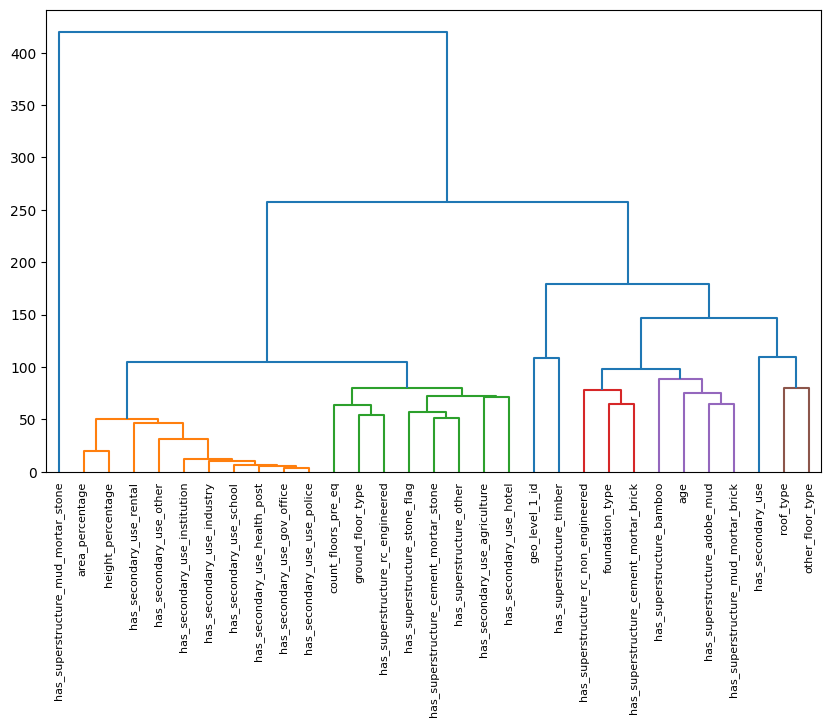

In [ ]:
# Para obtener el dendograma con el agrupamiento por características, se hace necesario obtener la transpuesta de la matriz del dataset
df_T = df.drop([target_field], axis=1).T

dist = DistanceMetric.get_metric('euclidean')
D = dist.pairwise(df_T)
avD = np.average(D)
print("Distancia Media\t {:6.2f}".format(avD))

# Constuimos el dendograma
plt.figure(figsize=(10, 6))
threshold_2 = 90
# Seleccionamos como distancia intercluster el vecino más alejado (complete)
clusters = cluster.hierarchy.linkage(D, method='complete');
cluster.hierarchy.dendrogram(clusters, color_threshold=threshold_2, labels=df.drop([target_field], axis=1).columns.to_list(), leaf_rotation=90);
plt.show();

## Matriz de Correlación

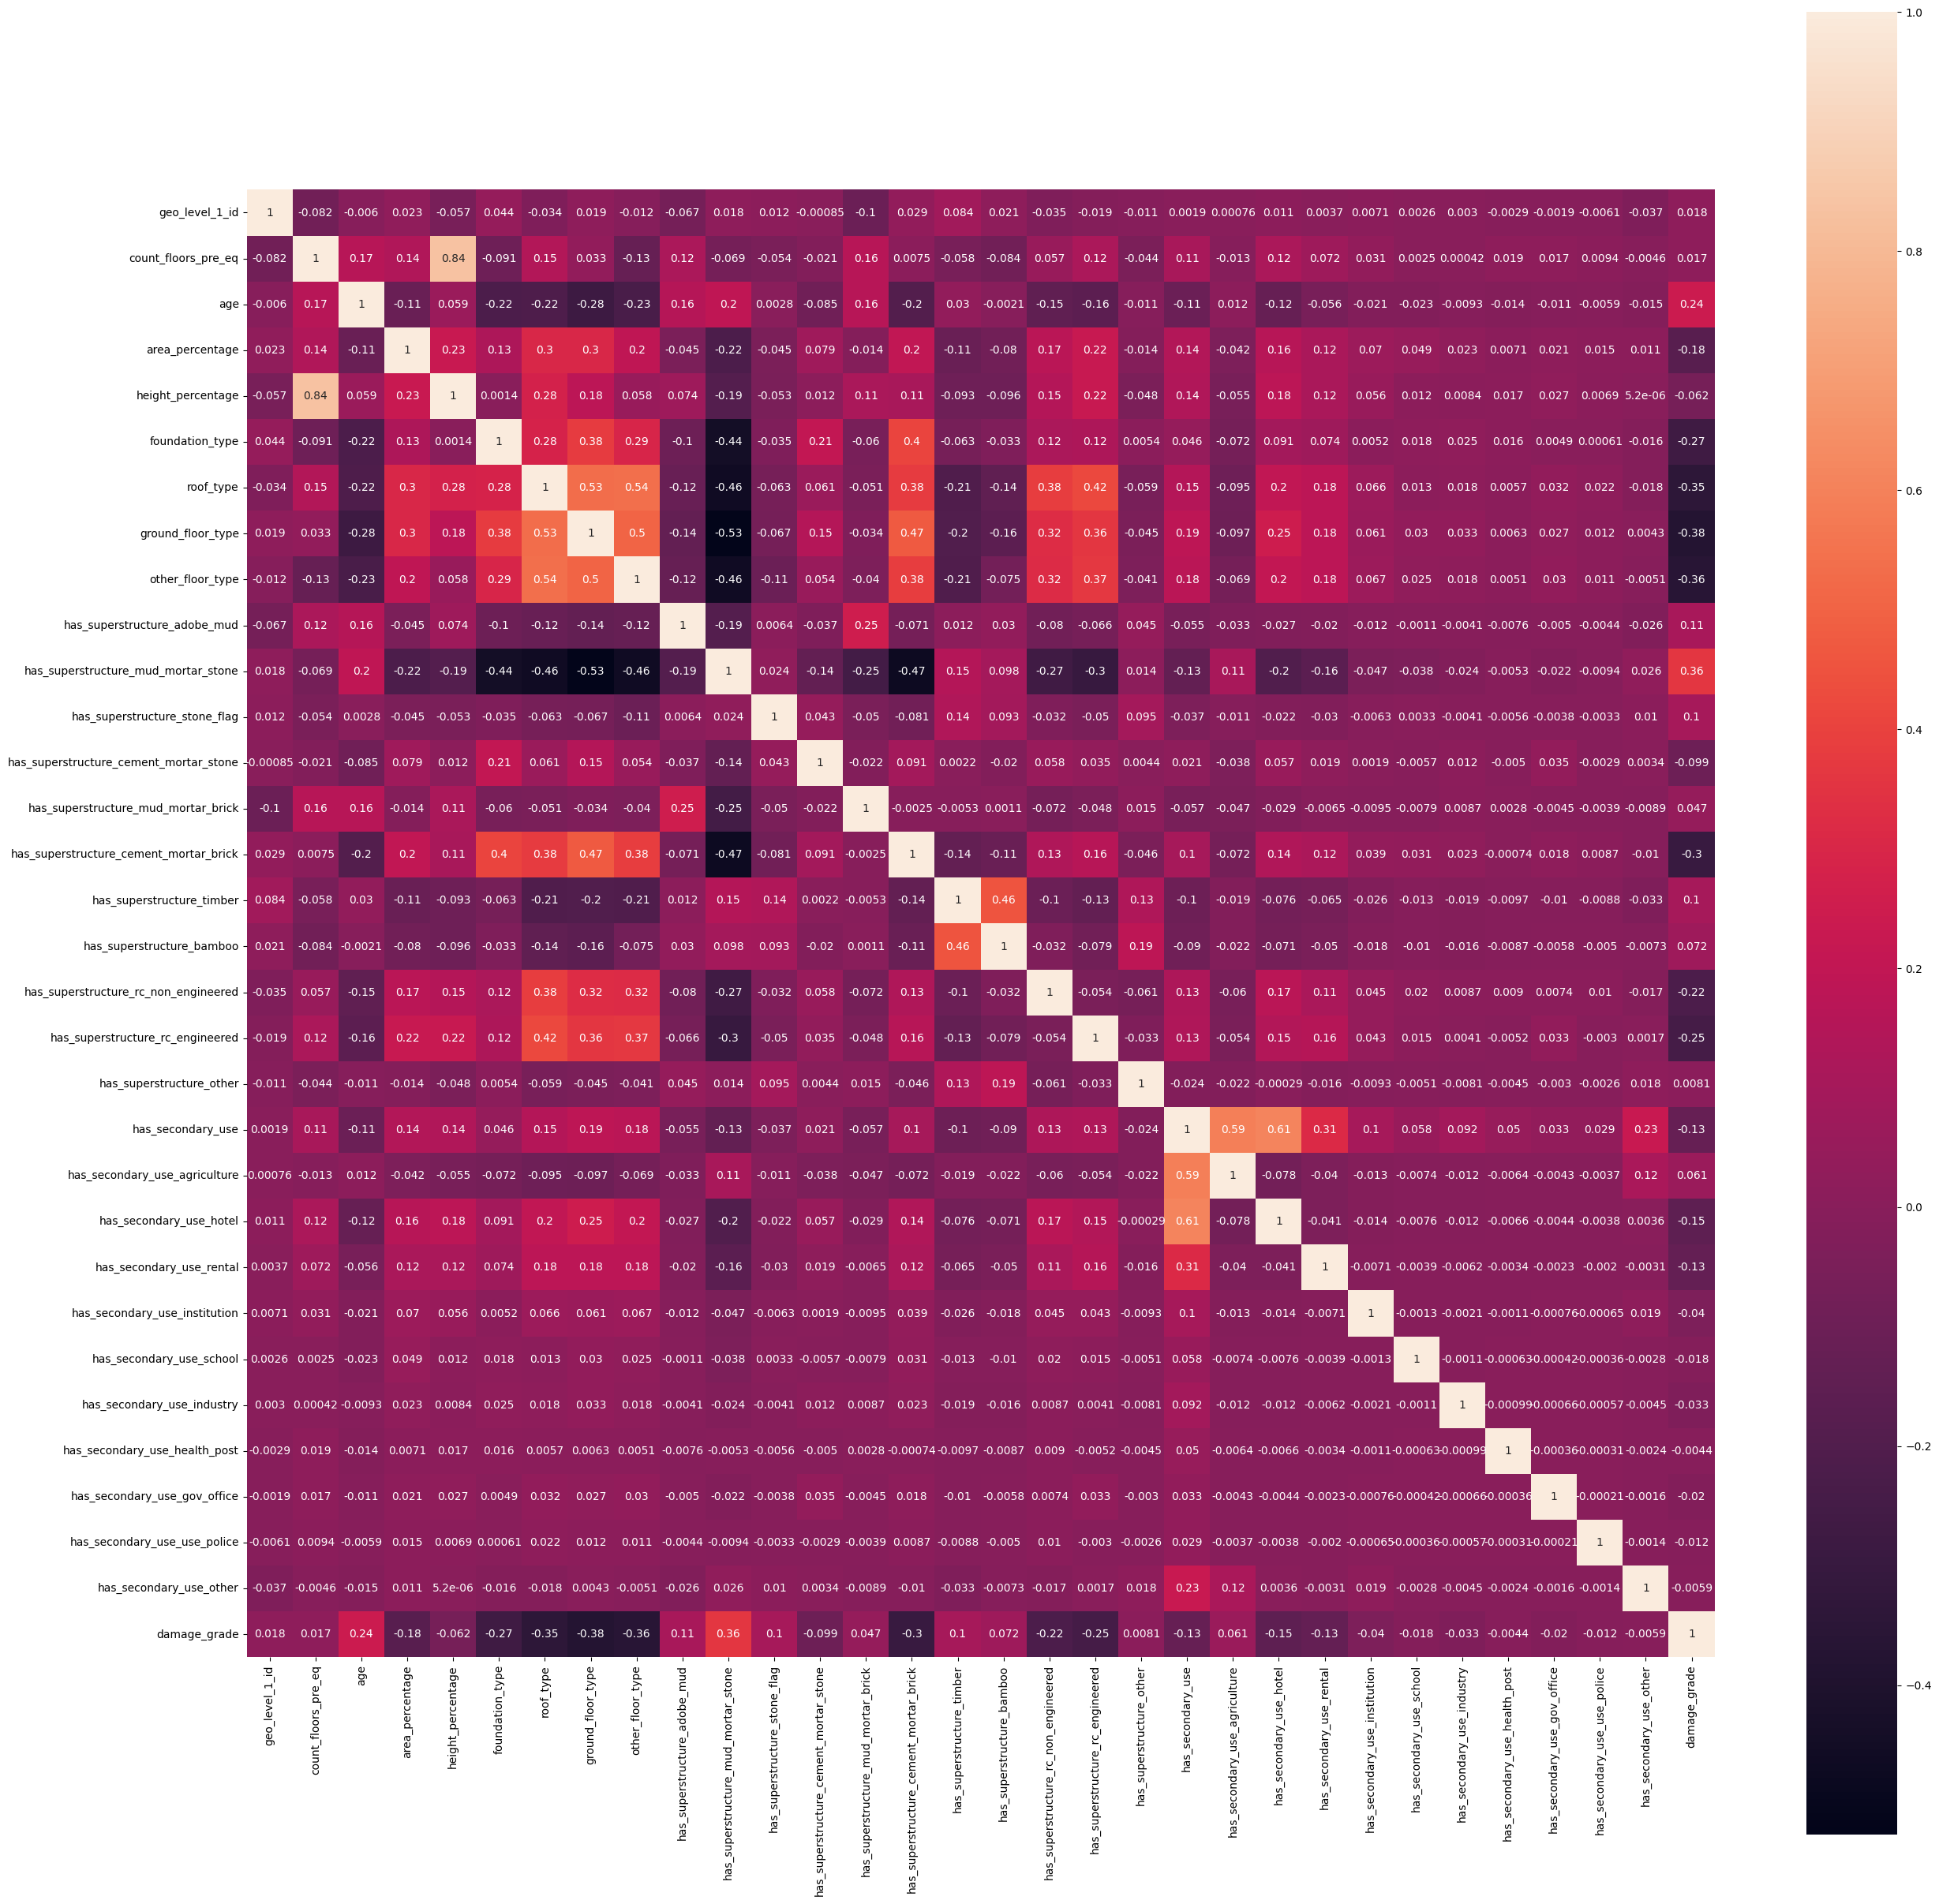

In [ ]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(df.corr(), square=True, annot=True, ax=ax);

Ranking de correlación del target con el resto de variables aplicando valor absoluto.

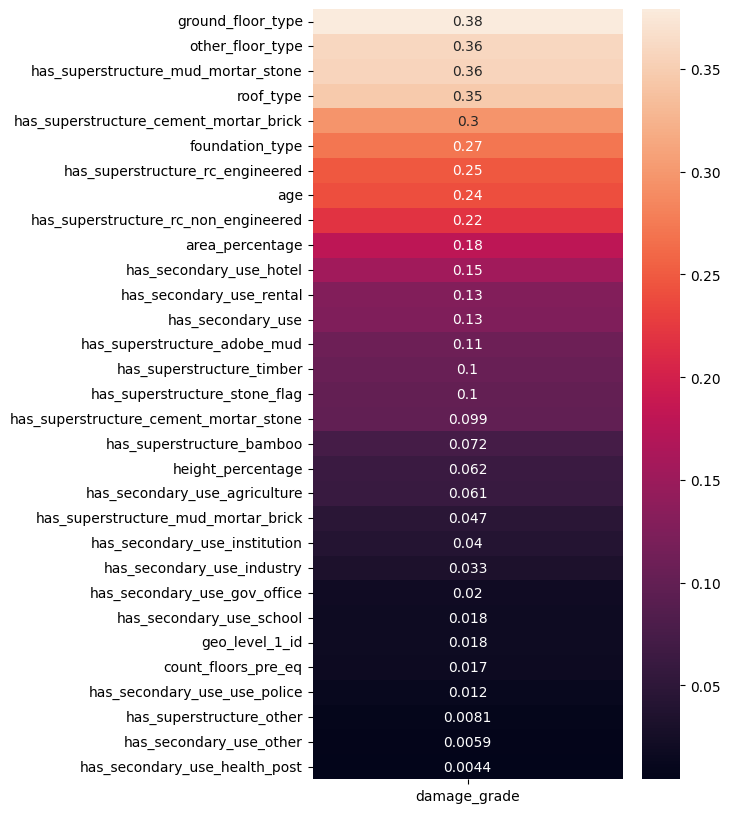

In [ ]:
fig, ax = plt.subplots(figsize=(5,10))
sns.heatmap(df.corr()[target_field].drop(target_field).abs().sort_values(ascending=False).to_frame(), annot=True, ax=ax);

Correlaciones altas entre variables

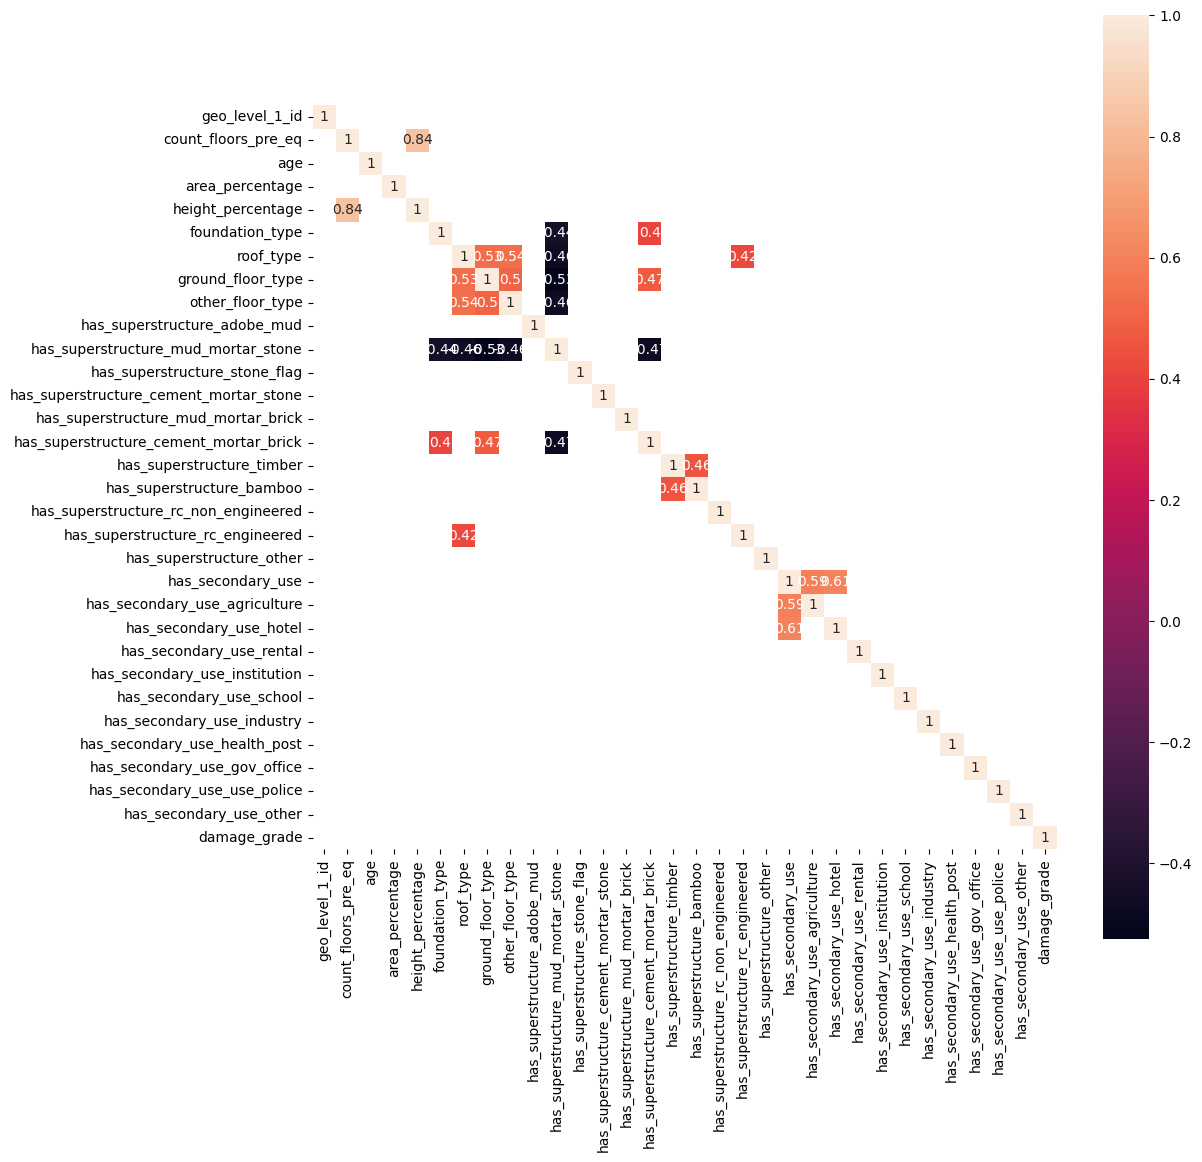

In [ ]:
min_corr = 0.4

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr()[df.corr().abs() > min_corr], square=True, annot=True, ax=ax);

<Axes: >

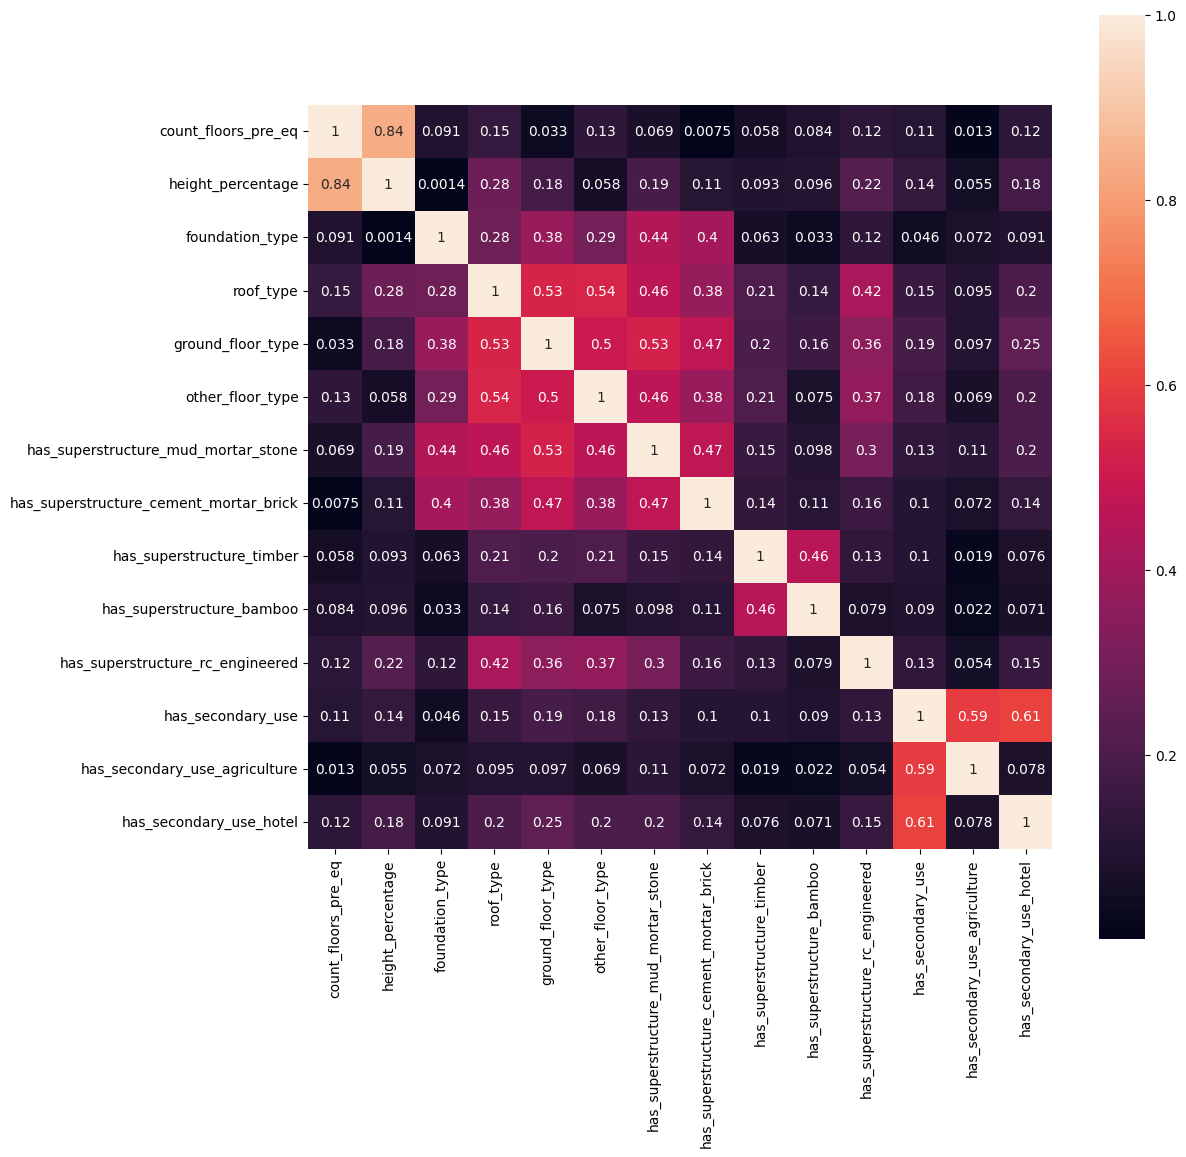

In [ ]:
min_corr = 0.4
# Calculando la matriz de correlación y filtrando según el criterio establecido
corr_matrix = df.corr().abs()
corr_matrix_index = corr_matrix[corr_matrix > min_corr].sum() > 1

# Creando el gráfico
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_matrix[corr_matrix_index.index][corr_matrix_index].loc[corr_matrix_index, corr_matrix_index],
            square=True, annot=True, ax=ax)

## SelectKBest

La función usado por defecto es el test ANOVA F-value para tareas de clasificación y el test F-value de regresión lineal

In [ ]:
# Crear el objeto SelectKBest con la función de prueba chi-cuadrado
k_best = SelectKBest(k='all')

# Aplicar la transformación a tus datos
k_best.fit_transform(df.drop(target_field, axis=1), df[target_field])

# Obtener las puntuaciones de las características y los índices de las características seleccionadas
feature_scores = pd.DataFrame({'Feature': df.drop(target_field, axis=1).columns, 'Score': k_best.scores_})

# Ordenar las características por puntuación en orden descendente
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Obtener los índices de las características seleccionadas después de la ordenación
selected_features_indices = k_best.get_support(indices=True)

# Imprimir las puntuaciones y las características seleccionadas
print("Puntuaciones de características:")
print(feature_scores)

Puntuaciones de características:
                                   Feature   Score
7                        ground_floor_type 1562.93
8                         other_floor_type 1523.92
10     has_superstructure_mud_mortar_stone 1399.22
6                                roof_type 1343.25
14  has_superstructure_cement_mortar_brick  853.28
5                          foundation_type  725.82
18        has_superstructure_rc_engineered  679.92
2                                      age  623.34
17    has_superstructure_rc_non_engineered  530.87
3                          area_percentage  285.83
22                 has_secondary_use_hotel  213.95
23                has_secondary_use_rental  158.63
20                       has_secondary_use  136.90
9             has_superstructure_adobe_mud  122.15
15               has_superstructure_timber  103.90
11           has_superstructure_stone_flag   92.73
12  has_superstructure_cement_mortar_stone   81.12
13     has_superstructure_mud_mortar_brick   44.5

Usar la función Chi2 no es apropiado para este tipo de problema con datos conitnuos y sin normalizar. Es más recomendable que se use con problemas con datos categóricos.

In [ ]:
# Crear el objeto SelectKBest con la función de prueba chi-cuadrado
k_best = SelectKBest(score_func=chi2, k='all')

# Aplicar la transformación a tus datos
k_best.fit_transform(df.drop(target_field, axis=1), df[target_field])

# Obtener las puntuaciones de las características y los índices de las características seleccionadas
feature_scores = pd.DataFrame({'Feature': df.drop(target_field, axis=1).columns, 'Score': k_best.scores_})

# Ordenar las características por puntuación en orden descendente
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Obtener los índices de las características seleccionadas después de la ordenación
selected_features_indices = k_best.get_support(indices=True)

# Imprimir las puntuaciones y las características seleccionadas
print("Puntuaciones de características:")
print(feature_scores)

Puntuaciones de características:
                                   Feature   Score
14  has_superstructure_cement_mortar_brick 1359.23
6                                roof_type 1293.22
18        has_superstructure_rc_engineered 1198.27
17    has_superstructure_rc_non_engineered  893.65
7                        ground_floor_type  859.57
5                          foundation_type  834.39
10     has_superstructure_mud_mortar_stone  807.91
8                         other_floor_type  555.39
22                 has_secondary_use_hotel  386.14
23                has_secondary_use_rental  304.84
2                                      age  235.94
20                       has_secondary_use  221.49
9             has_superstructure_adobe_mud  217.91
11           has_superstructure_stone_flag  173.29
12  has_superstructure_cement_mortar_stone  153.71
15               has_superstructure_timber  143.40
13     has_superstructure_mud_mortar_brick   81.75
16               has_superstructure_bamboo   76.0

## Distribución KDE e Histograma

El gráfico KDE muestra la distribución de densidad de cada variable. Superponiendo el gráfico KDE de las distinas categorías podemos buscar aquellas variables donde los picos no estén alineados.

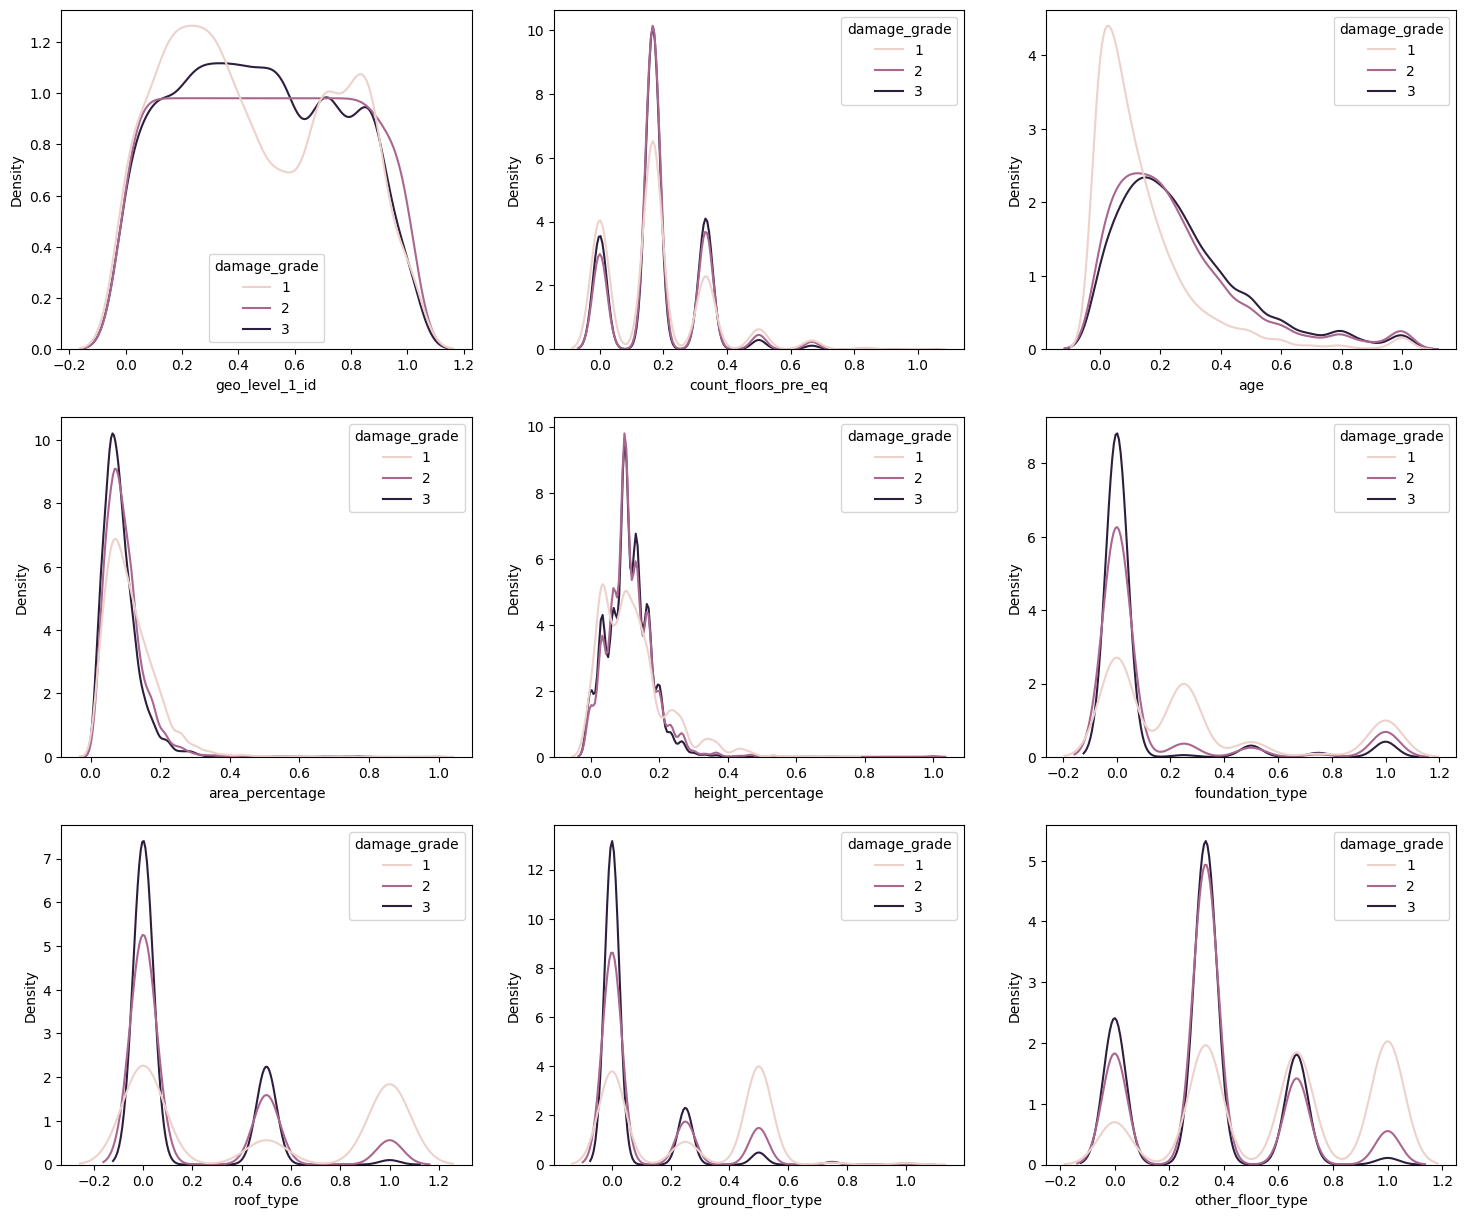

In [ ]:
# Gráfico de distribución kde por cada variable dependiente
cols = numeric_cols.to_list() + categorical_cols.to_list()

ncols = 3
fig, ax = plt.subplots(nrows=int(np.floor(len(cols)/ncols)), ncols = ncols, figsize = (6*ncols, np.floor(len(cols)/ncols)*5))

i,j = 0,0
for c in cols:
  if c != target_field:
    sns.kdeplot(df, x=c, hue=target_field, common_norm=False, fill=False, ax=ax[i, j], legend=True)

    j+=1
    if j==ncols:
        i+=1
        j=0

plt.show();

El histograma nos da información parecida pero es más complicado de representar si hay demasiadas variables. El KDE puede mostrarse junto al histograma.

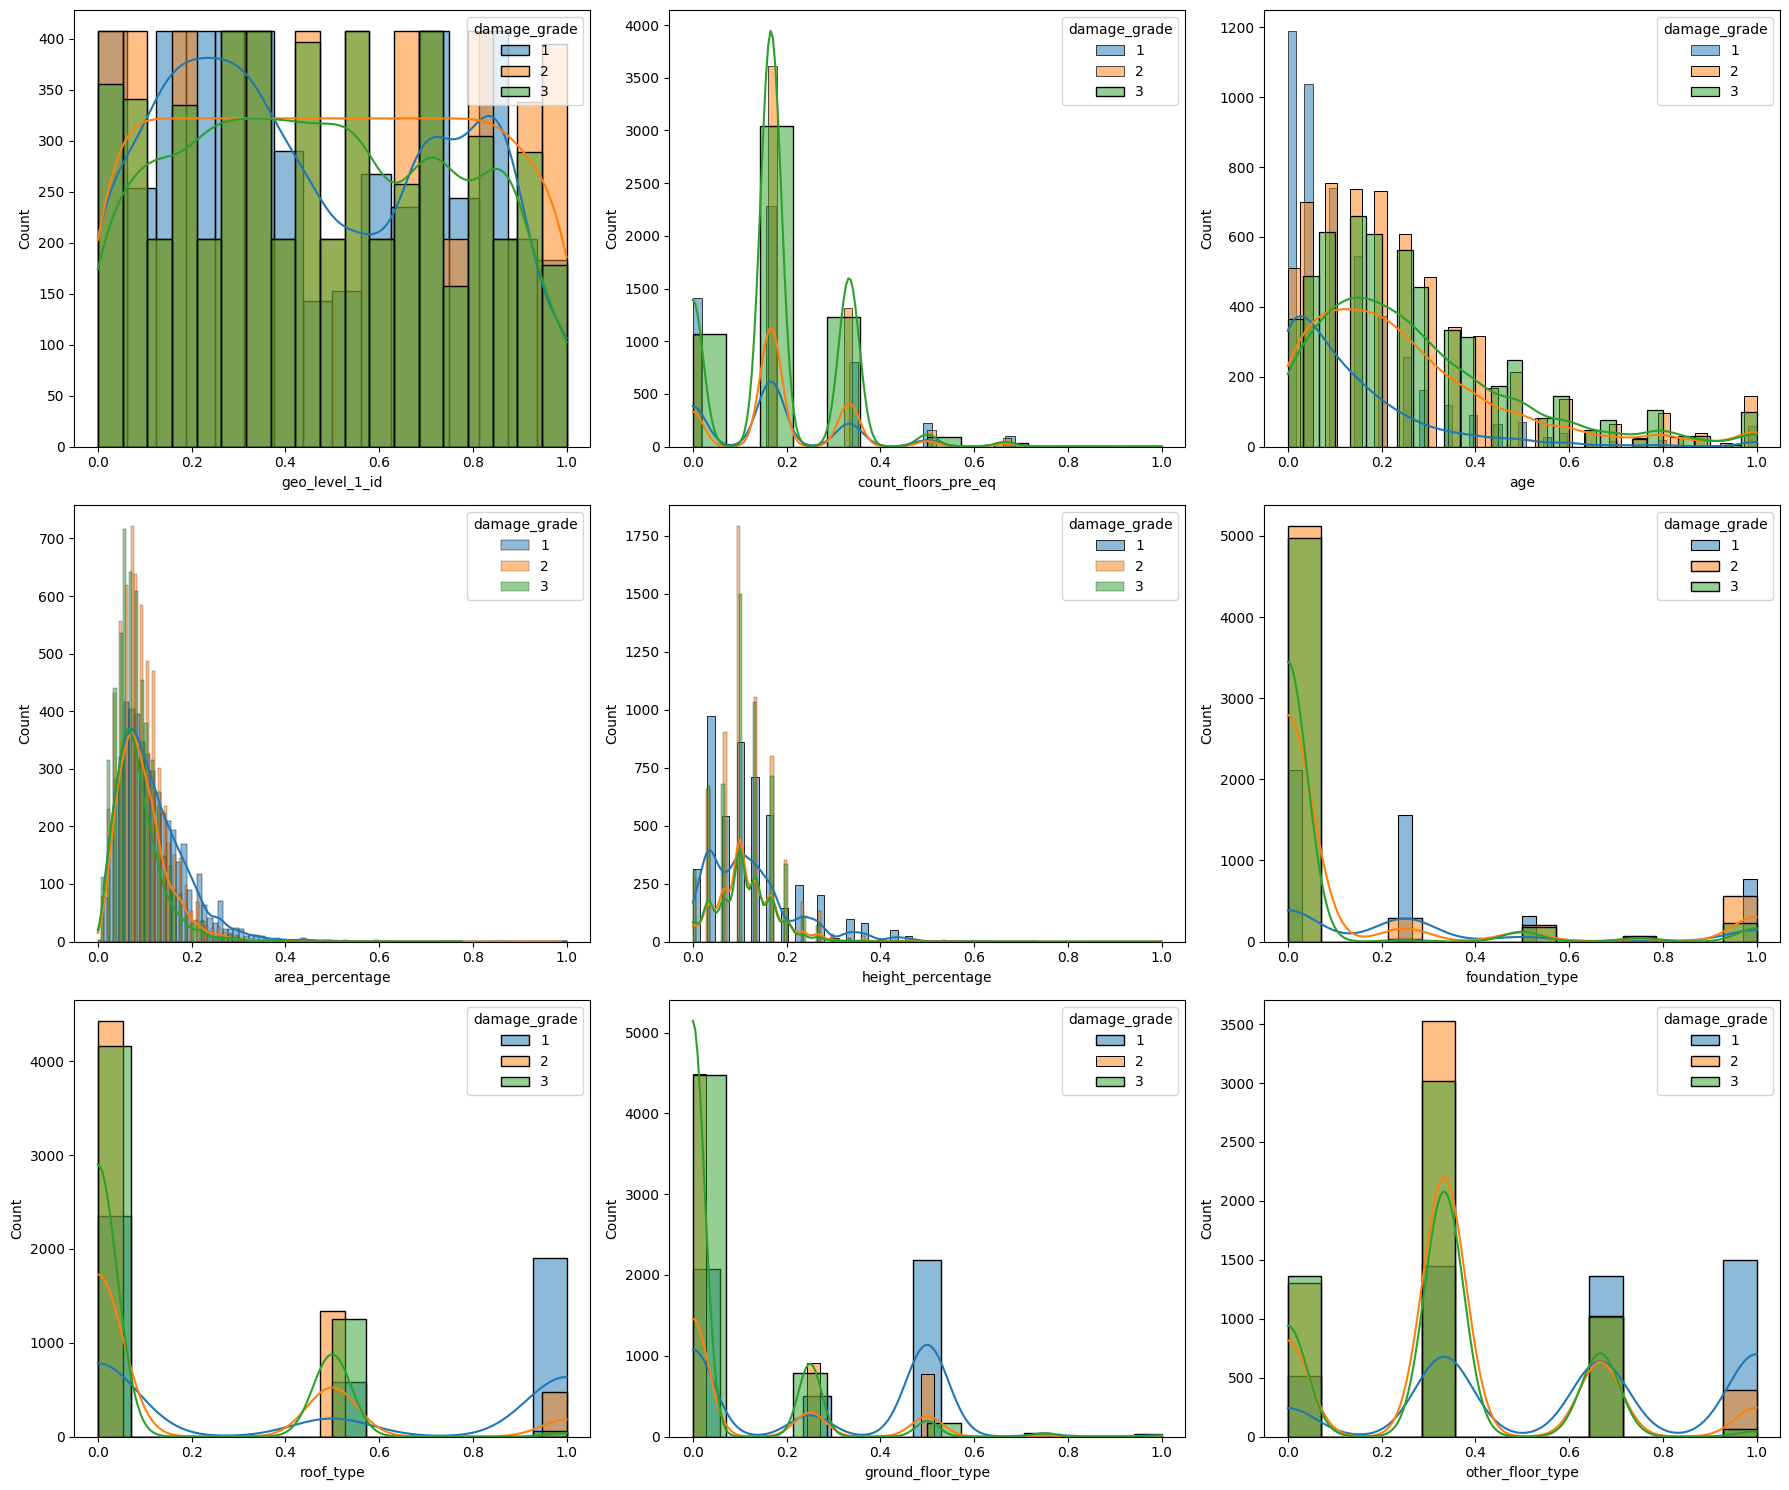

In [ ]:
# Historgrama y kde de por cada variable dependiente
cols = numeric_cols.to_list() + categorical_cols.to_list()

ncols = 3
fig, ax = plt.subplots(nrows=int(np.floor(len(cols)/ncols)), ncols = ncols, figsize = (6*ncols, np.floor(len(cols)/ncols)*5))

i,j = 0,0
for c in cols:
  if c != target_field:
    #for q in df['quality'].unique():
    for q in np.sort(df[target_field].unique()):
      sns.histplot(df.query(target_field + ' == '+ str(q))[c], kde = True, ax = ax[i,j], label = q)

    #Se reordenan los valores de la leyenda de menor a mayor por la calidad.
    #handles, labels = ax[i,j].get_legend_handles_labels()
    #labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: int(t[0])))
    #ax[i,j].legend(handles, labels, title='quality')

    ax[i,j].legend(title=target_field)

    j+=1
    if j==ncols:
        i+=1
        j=0

plt.tight_layout();

## Gráfico de cajas

El gráfico de cajas nos muestra los valores entre el primer y el tercer cuartil, señalizando el valor de la mediana. Además nos muestra los outliers por medio de puntos.

Si observamos diferencias en las alturas de las cajas para las diferentes categorías, es probable que dicha variable sea una buena opción a seleccionar para entrenar el modelo de clasificación.

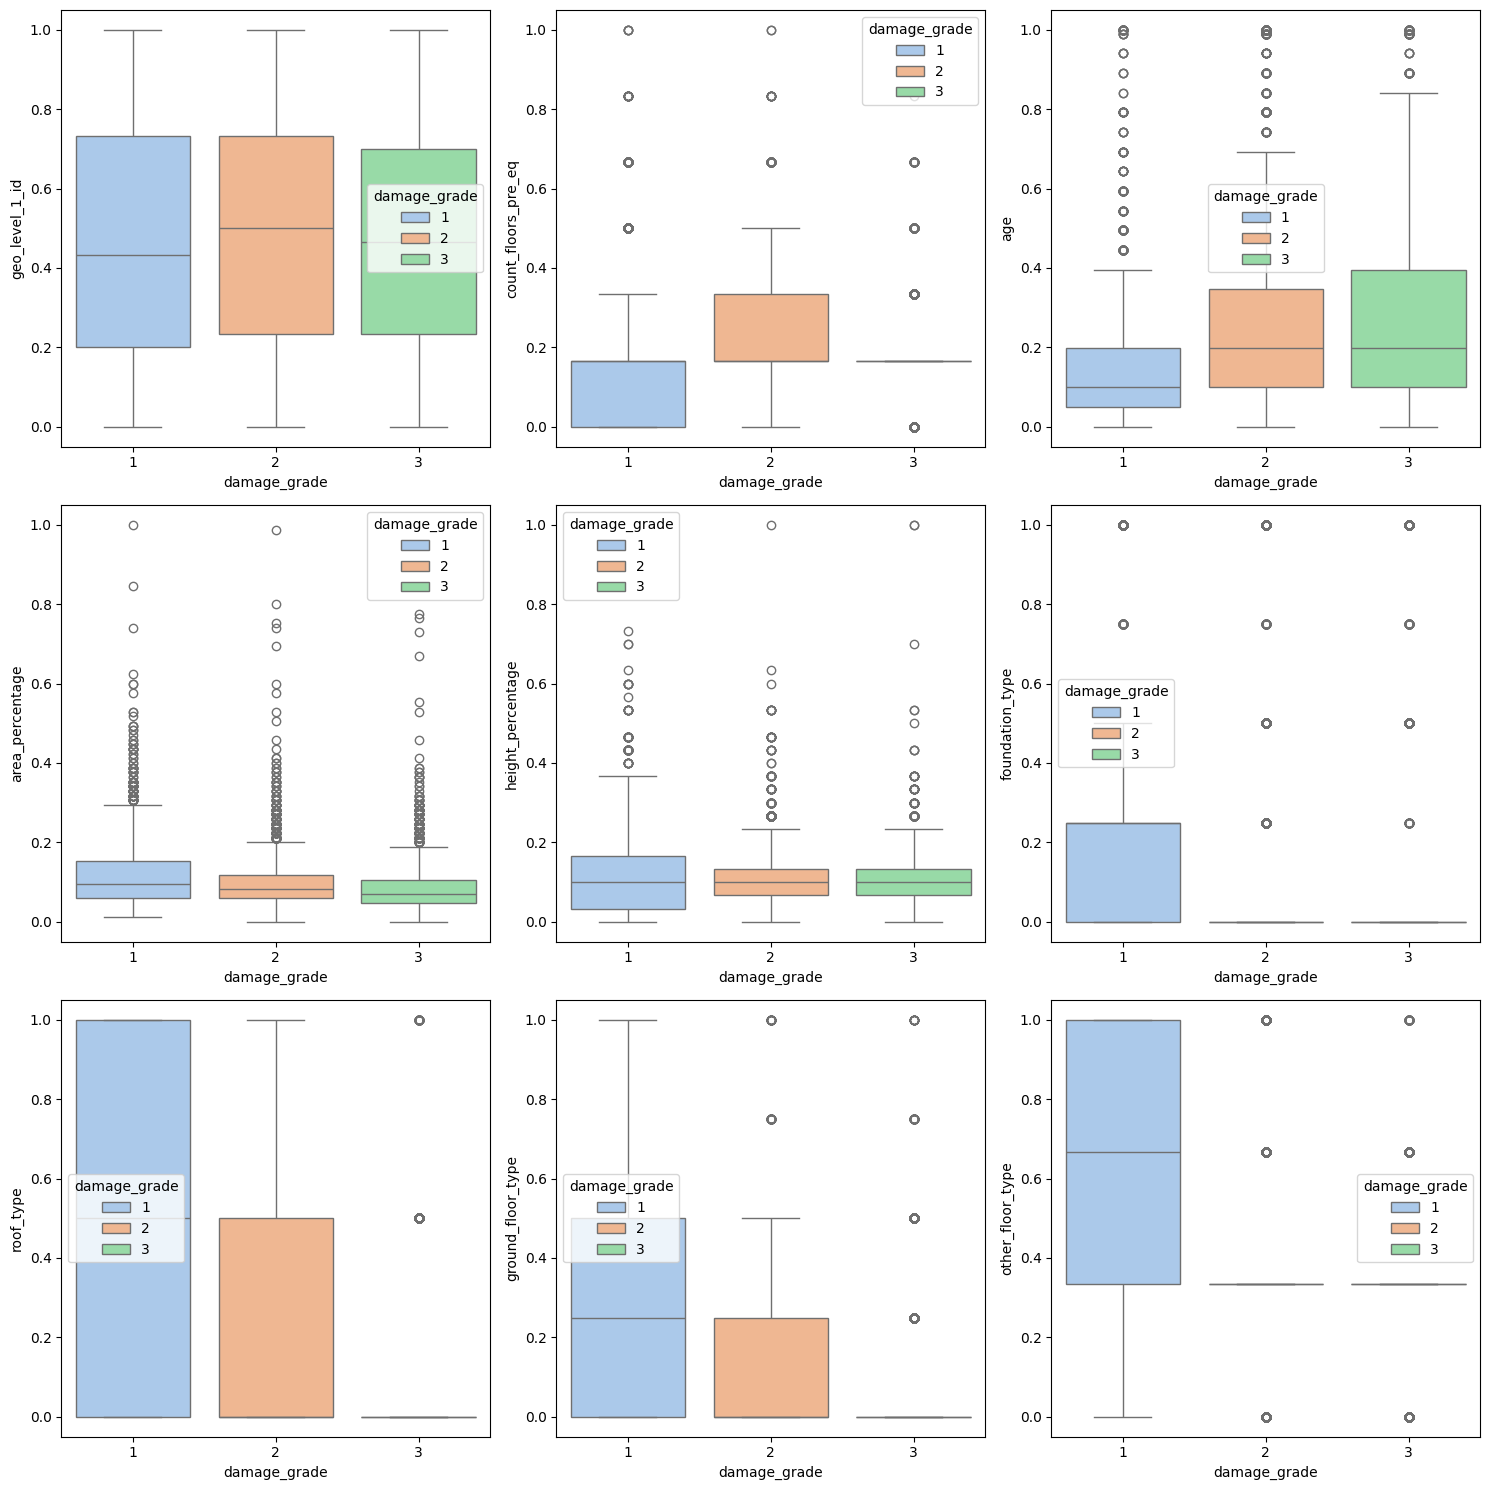

In [ ]:
# Gráfico de cajas por cada variable dependiente
cols = numeric_cols.to_list() + categorical_cols.to_list()

ncols = 3
fig, ax = plt.subplots(nrows=int(np.floor(len(cols)/ncols)), ncols = ncols, figsize = (5*ncols, np.floor(len(cols)/ncols)*5))

i,j = 0,0
for c in cols:
  if c != target_field:
    sns.boxplot(x = target_field, y = c, hue = target_field, data = df, ax = ax[i,j], palette='pastel')

    j+=1
    if j==ncols:
        i+=1
        j=0

plt.tight_layout();

## Gráfico de violín

El gráfico de violín nos permite ver la distribución de un variable y al observar diferencias en la forma del violín para las diferentes categorías es probable que dicha variable sea una buena opción a seleccionar para entrenar el modelo de clasificación.

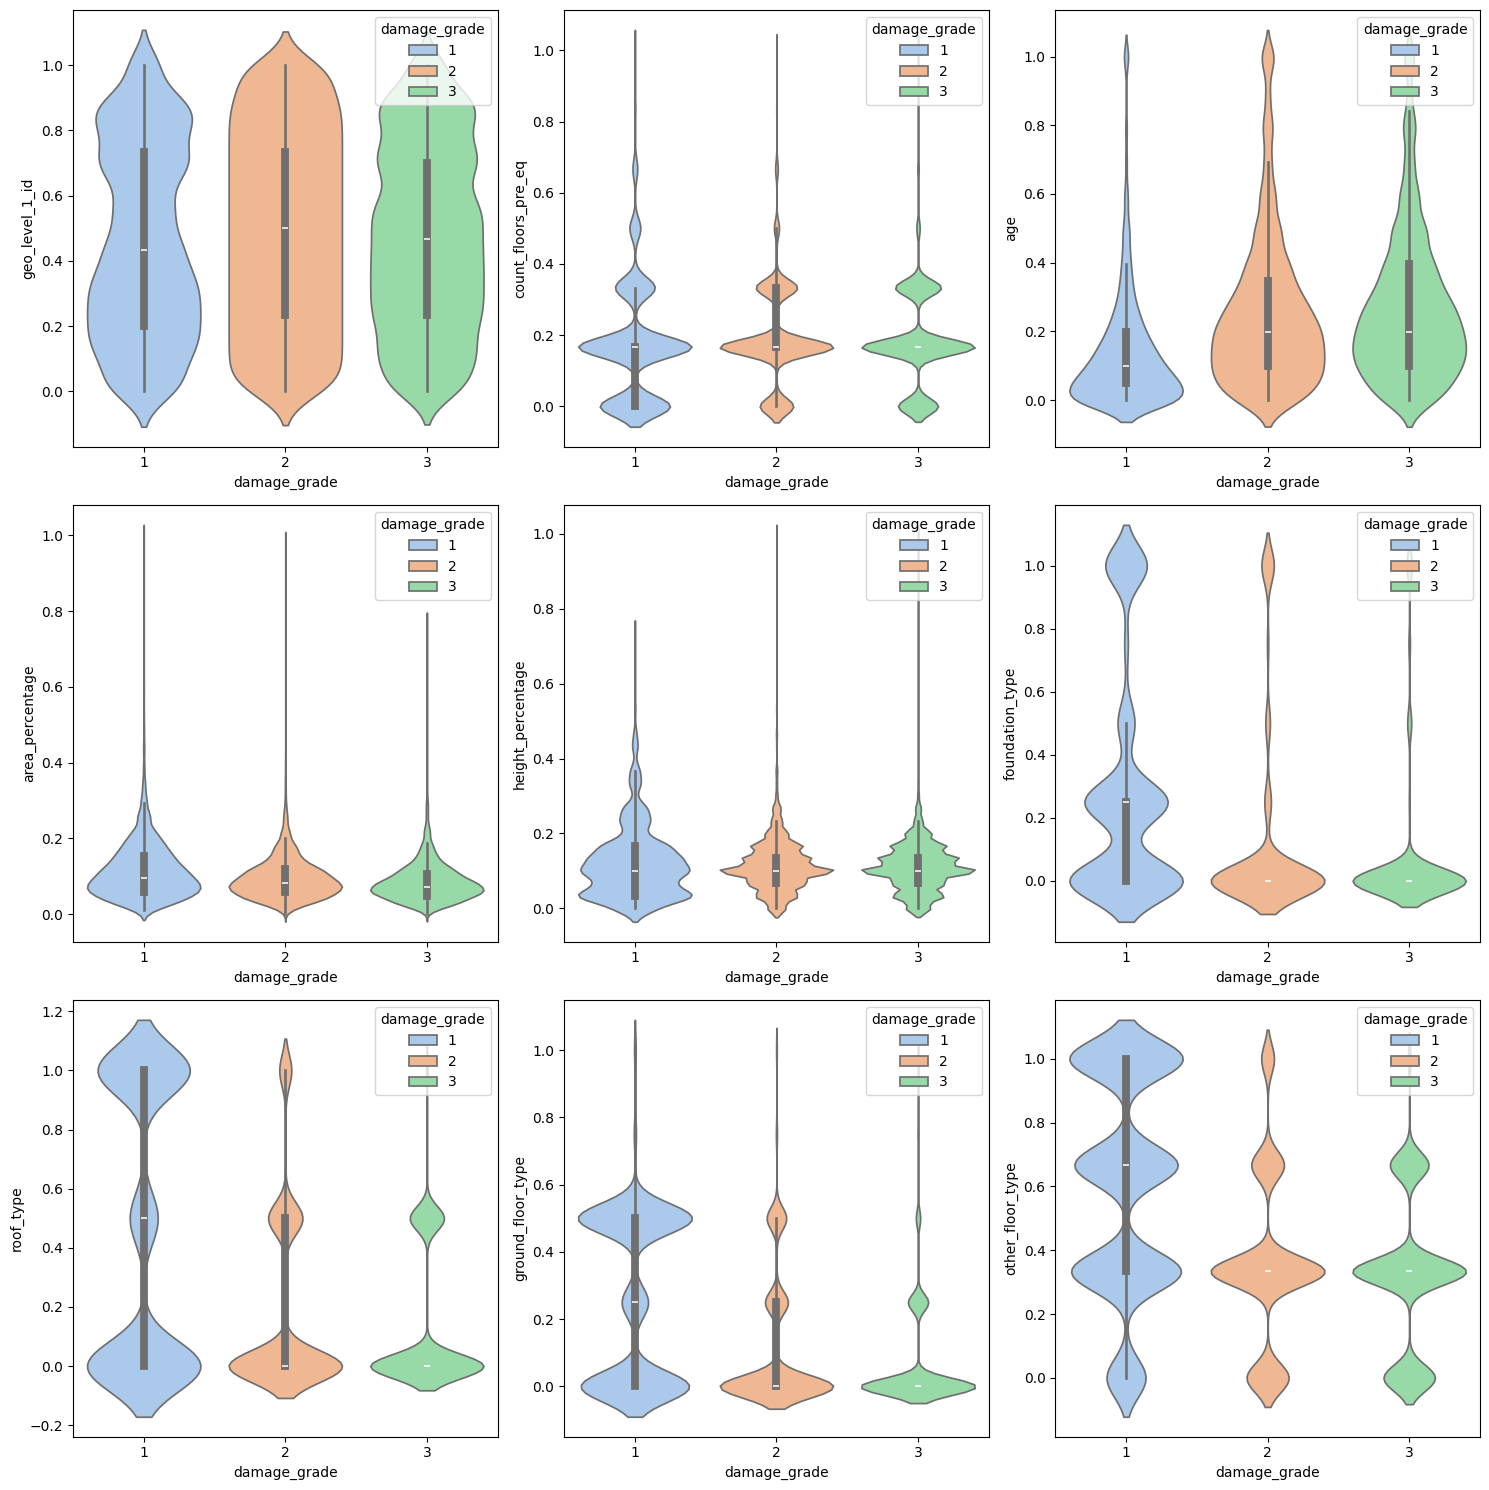

In [ ]:
# Gráfico de cajas por cada variable dependiente
cols = numeric_cols.to_list() + categorical_cols.to_list()

ncols = 3
fig, ax = plt.subplots(nrows=int(np.floor(len(cols)/ncols)), ncols = ncols, figsize = (5*ncols, np.floor(len(cols)/ncols)*5))

i,j = 0,0
for c in cols:
  if c != target_field:
    sns.violinplot(x = target_field, y = c, hue = target_field, data = df, ax = ax[i,j], palette='pastel')

    j+=1
    if j==ncols:
        i+=1
        j=0

plt.tight_layout();

In [ ]:
# Se comprueban las columnas con valores binarios
[column for column in df.columns if column not in (numeric_cols.to_list() + categorical_cols.to_list() + [target_field])]

['has_superstructure_adobe_mud',
 'has_superstructure_mud_mortar_stone',
 'has_superstructure_stone_flag',
 'has_superstructure_cement_mortar_stone',
 'has_superstructure_mud_mortar_brick',
 'has_superstructure_cement_mortar_brick',
 'has_superstructure_timber',
 'has_superstructure_bamboo',
 'has_superstructure_rc_non_engineered',
 'has_superstructure_rc_engineered',
 'has_superstructure_other',
 'has_secondary_use',
 'has_secondary_use_agriculture',
 'has_secondary_use_hotel',
 'has_secondary_use_rental',
 'has_secondary_use_institution',
 'has_secondary_use_school',
 'has_secondary_use_industry',
 'has_secondary_use_health_post',
 'has_secondary_use_gov_office',
 'has_secondary_use_use_police',
 'has_secondary_use_other']

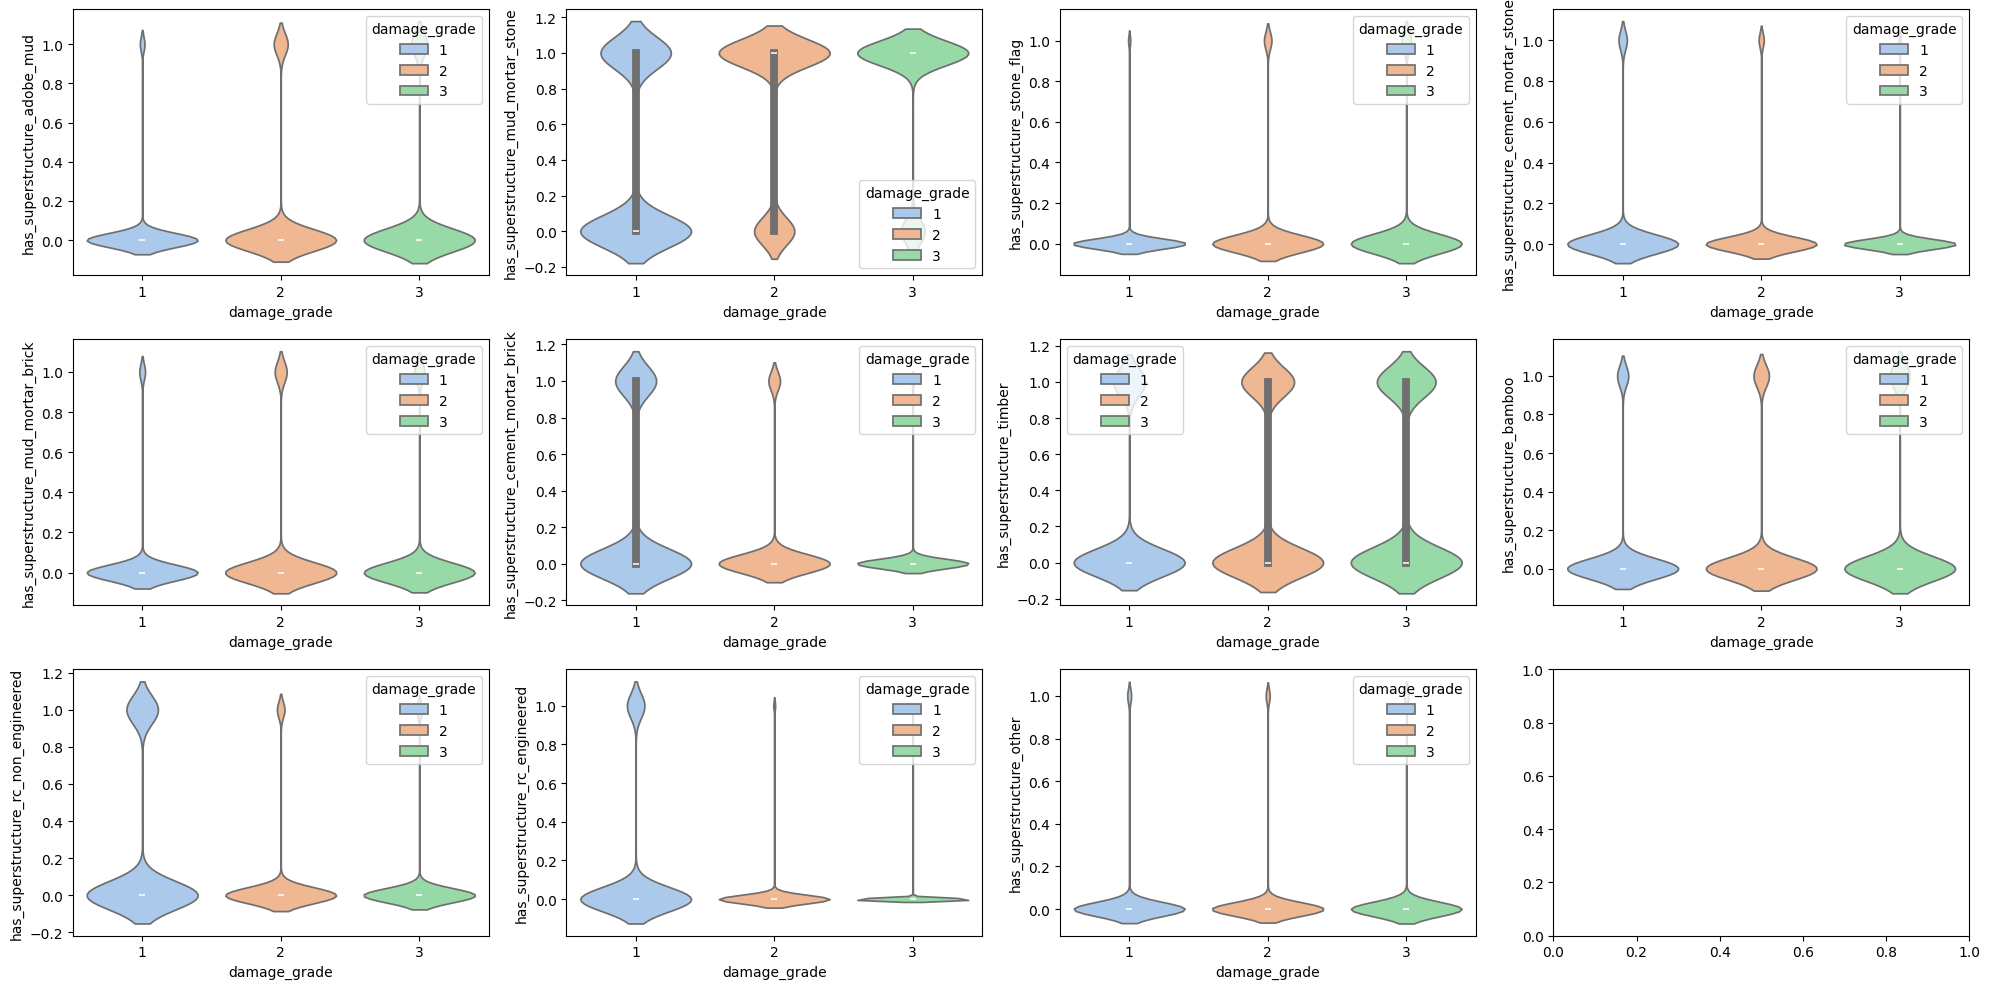

In [ ]:
# Gráfico de violin por cada variable dependiente
cols =  [column for column in df.columns if column not in (numeric_cols.to_list() + categorical_cols.to_list() + [target_field])][:11]

ncols = 4
fig, ax = plt.subplots(nrows=int(np.ceil(len(cols)/ncols)), ncols = ncols, figsize = (5*ncols, np.floor(len(cols)/ncols)*5))

i,j = 0,0
for c in cols:
  if c != target_field:
    sns.violinplot(x = target_field, y = c, hue = target_field, data = df, ax = ax[i,j], palette='pastel')

    j+=1
    if j==ncols:
        i+=1
        j=0

plt.tight_layout();

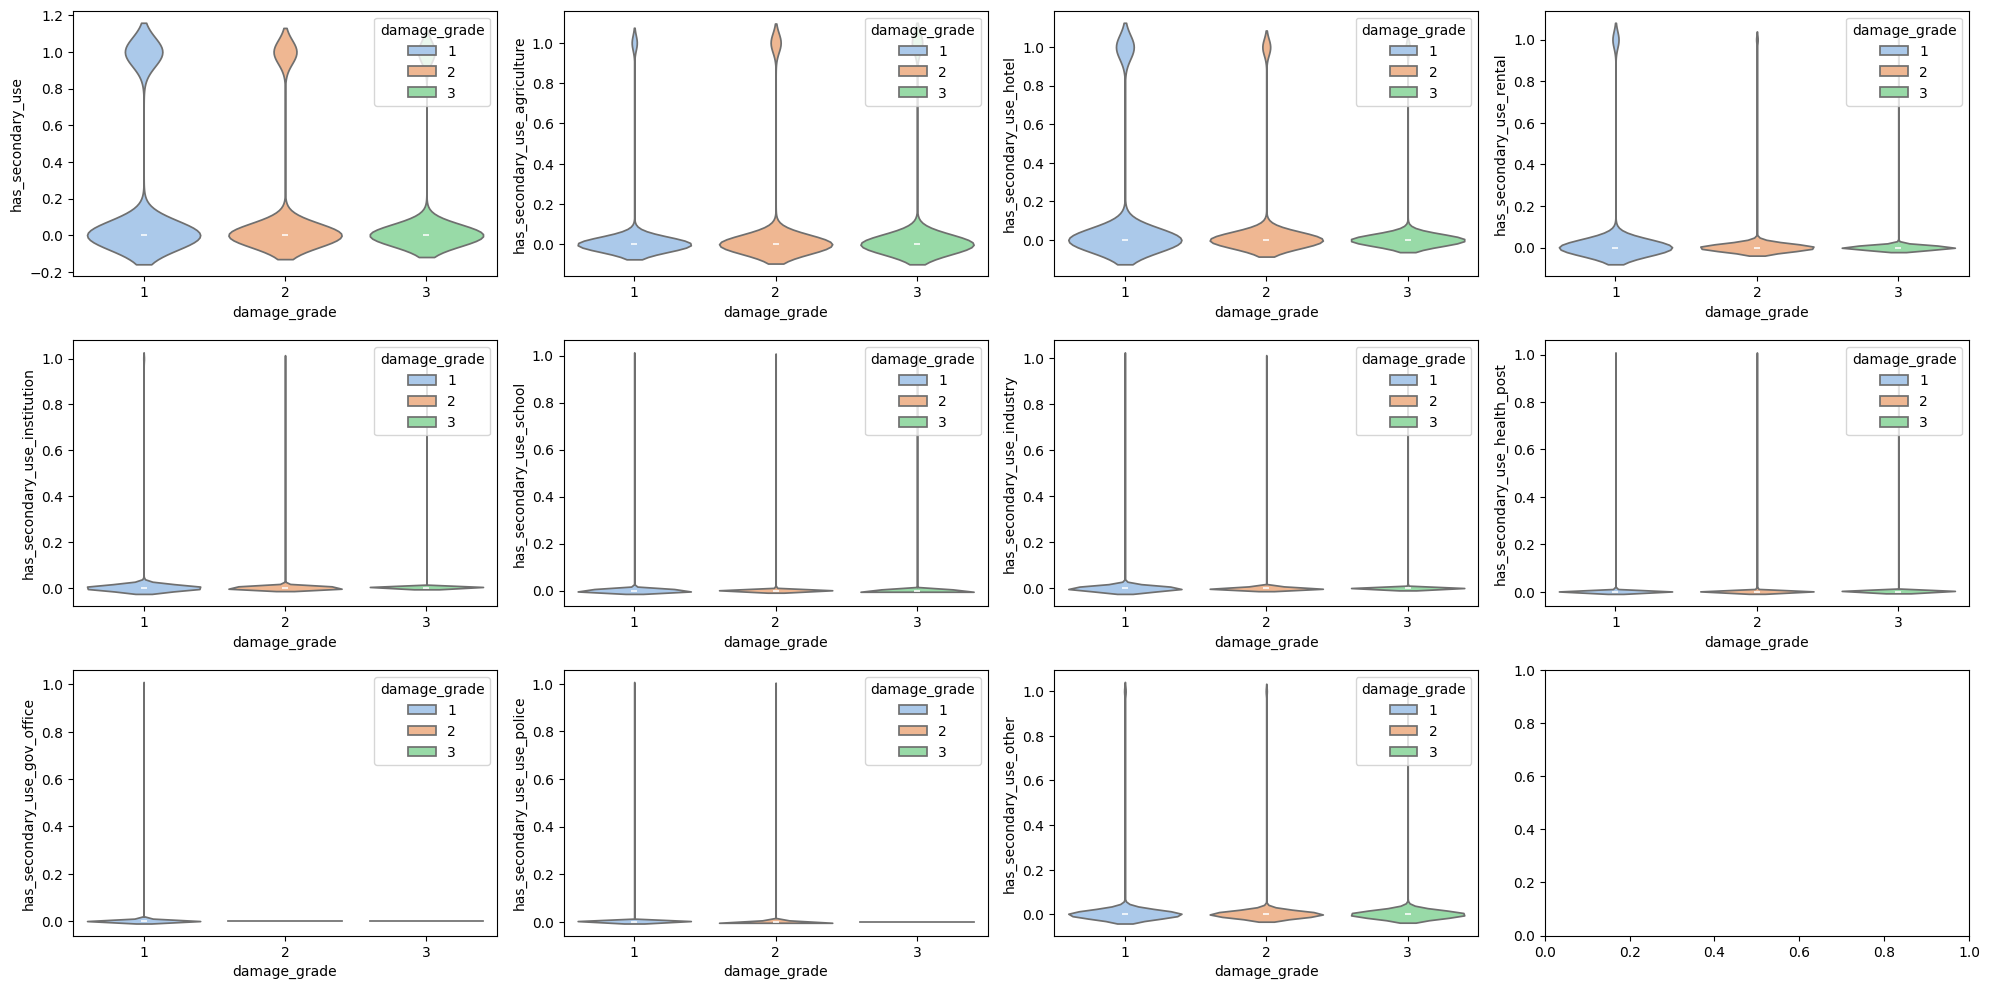

In [ ]:
# Gráfico de violin por cada variable dependiente
cols =  [column for column in df.columns if column not in (numeric_cols.to_list() + categorical_cols.to_list() + [target_field])][11:]

ncols = 4
fig, ax = plt.subplots(nrows=int(np.ceil(len(cols)/ncols)), ncols = ncols, figsize = (5*ncols, np.floor(len(cols)/ncols)*5))

i,j = 0,0
for c in cols:
  if c != target_field:
    sns.violinplot(x = target_field, y = c, hue = target_field, data = df, ax = ax[i,j], palette='pastel')

    j+=1
    if j==ncols:
        i+=1
        j=0

plt.tight_layout();

# Selección de características


*   Conclusiones
*   Selección



## Conclusiones

Entre las características existentes finalmente se han seleccionado las siguientes 8 características, partiendo del dendograma como base para elegir características que guarden buena correlación con otro grupo de variables y den información de dicho grupo a la vez que mantienen también cierta correlación con la variable dependiente.Para ello nos apoyamos en las diferentes gráficas representadas.

Las variables eleigidas son:

- has_superstructure_mud_mortar_stone: Aparece sólo en el dendograma, por lo que es la única de su "grupo". Además mantiene una de las mejores correlaciones con el target, una de las mejoreas puntuaciones con el método SelectKBest y el gráfico de violín muestra que puede ayudar a clasificar alguna de las clases.

- area_percentage: pertenece a un grupo que en su mayoría no tiene buena correlación con la variable dependiente. Es la única variable que tiene cierta puntuación decente en SelecctKBest, guarda algo de correlación con el target y el gráfico de cajas muestra que puede agregar algo de información. Se mantiene por ser la mejor de su grupo en el dendograma.

- ground_floor_type: De nuevo la mejor de su grupo, destaca en la matriz de correlación, el método SelectKBest y se aprecia tanta en el gráfico de densidad KDE, el histograma, el gráfico de cajas y el gráfico de violín que puede ser útil.

- has_superstructure_cement_mortar_brick: Se ha elegido dentro de su grupo por encima de foundation_type por estar algo mejor posicionada en la matriz de correlación, en el ranking de SelectKBest y por apreciarse algo más interesante en el gráfico de violín. Y porque foundation_type no presenta muy bunea distribución entre sus categorías para ser más interesante de elegir.

- age: Es de las variable con mayor rango numérico y parece interesenta si observamos las diferentes gráficas de densidad KDE, histograma, de cajas y de violín. Además, aunque no está de las mejores variables en los rankings, está bien posiocionada.

- roof_type: Tanto esta como other_floor_type son muy similares en todos los puntos. La decisión se ha tomado porque se ha considerado que roof_type puede ayudar un poco más en función de las gráficas, pero no se considera que haya una gran diferencia entre elegir una u otra.

- has_secondary_use: No tiene un grupo propiamente dicho no se observa en los gráficos que sea muy útil. Básicamente se mantiene porque puede dar un poco de información que no tengan las otras variables al estar sólo en el dendograma.

- has_superstructure_timber: De forma similar a la anterior está sólo en el dendograma, siendo geo_level_1_id lo variable más cercana. Se ha elegido esta porque al eliminar filas teniendo en cuenta una proporción de muestras por zona la variable geo_level_1_id no nos será de utilidad, ya que se ha pretendido que la predicción sea independiente de la ubicación.



## Selección

In [ ]:
df = df[['has_superstructure_mud_mortar_stone', 'area_percentage', 'ground_floor_type',
         'has_superstructure_cement_mortar_brick', 'age', 'roof_type', 'has_secondary_use', 'has_superstructure_timber', 'damage_grade']]
df_test = df_test[['has_superstructure_mud_mortar_stone', 'area_percentage', 'ground_floor_type',
                   'has_superstructure_cement_mortar_brick', 'age', 'roof_type', 'has_secondary_use', 'has_superstructure_timber']]

# Visualización de un registro de cada categoría
display(df.drop_duplicates(target_field, keep='first'))
print(f"{df.shape[0]} rows x {df.shape[1]} columns")

has_superstructure_mud_mortar_stone  area_percentage  ground_floor_type  \
0                                    1             0.02               0.00   
1                                    0             0.12               0.25   
4                                    1             0.09               0.50   

   has_superstructure_cement_mortar_brick  age  roof_type  has_secondary_use  \
0                                       0 0.25       0.00                  0   
1                                       0 0.05       0.50                  1   
4                                       0 0.15       0.00                  1   

   has_superstructure_timber  damage_grade  
0                          0             3  
1                          0             1  
4                          0             2

16543 rows x 9 columns


# Separación del dataset en train, test y validation

1. Se separan datos de entrada y de salida
2. Se separan datos de entrenamiento y test
3. Se separan datos de entrenamiento en entrenamiento y validación (omitir)





## 1. Se separan datos de entrada y de salida

In [ ]:
##########
# PASO 1 #
##########

# Se separan los datos de entrada y salida
X = df.drop(target_field, axis=1)
y = df[target_field]
display(X)

has_superstructure_mud_mortar_stone  area_percentage  \
0                                        1             0.02   
1                                        0             0.12   
2                                        1             0.11   
3                                        0             0.42   
4                                        1             0.09   
...                                    ...              ...   
16538                                    0             0.08   
16539                                    1             0.09   
16540                                    1             0.12   
16541                                    1             0.19   
16542                                    1             0.05   

       ground_floor_type  has_superstructure_cement_mortar_brick  age  \
0                   0.00                                       0 0.25   
1                   0.25                                       0 0.05   
2                   0.50                                       0 0.50   
3                   0.25                                       0 0.00   
4                   0.50                                       0 0.15   
...                  ...                                     ...  ...   
16538               0.50                                       0 0.30   
16539               0.50                                       0 0.15   
16540               0.50                                       0 0.05   
16541               0.50                                       0 0.45   
16542               0.50                                       0 0.25   

       roof_type  has_secondary_use  has_superstructure_timber  
0           0.00                  0                          0  
1           0.50                  1                          0  
2           1.00                  0                          1  
3           0.50                  0                          0  
4           0.00                  1                          0  
...          ...                ...                        ...  
16538       1.00                  0                          1  
16539       0.00                  0                          0  
16540       0.00                  0                          0  
16541       0.00                  0                          1  
16542       0.00                  1                          0  

[16543 rows x 8 columns]

## 2. Se separan datos de entrenamiento y test

In [ ]:
##########
# PASO 2 #
##########

# Se separan datos de train y test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# Visualización de registros de cada categoría
train_samples = ytrain.value_counts()
test_samples = ytest.value_counts()
samples = pd.concat([train_samples, train_samples/len(ytrain), test_samples, test_samples/len(ytest)],
                    axis=1,
                    keys=["train", "train(%)", "test", "test(%)"])

# Editamos los índices en caso de ser valores numéricos
if target_field_to_categorical:
  samples.index = target_field[samples.index]

samples

train  train(%)  test  test(%)
damage_grade                                
2              4993      0.38  1248     0.38
3              4378      0.33  1095     0.33
1              3863      0.29   966     0.29

## 3. Se separan datos de entrenamiento en entrenamiento y validación

Al realizar posteriormente un entrenamiento con Cross Validation a través de la librería StratifiedKFold, esta separación es innecesaria pues los datos de validación se extraen directamente al aplicar dicho algoritmo. Es por ello que los valores obtenidos de dividir los datos en esta celda no se usan en este caso.

Sólo en el caso de entrenar el modelo sin Cross Validation tendría sentido hacer esta separación.

In [ ]:
##########
# PASO 3 #
##########

split_validation_data  = False

# Se separan datos de train y validation
Xtrain_val, Xvalidation, ytrain_val, yvalidation = train_test_split(Xtrain, ytrain, stratify=ytrain, test_size=0.20, random_state=42)

if split_validation_data:
  Xtrain = Xtrain_val
  ytrain = ytrain_val

# Visualización de registros de cada categoría
train_val_samples = ytrain_val.value_counts()
val_samples = yvalidation.value_counts()
samples = pd.concat([train_val_samples, train_val_samples/len(ytrain_val), val_samples, val_samples/len(yvalidation), test_samples, test_samples/len(ytest)],
                    axis=1,
                    keys=["train", "train(%)", "validation", "validation(%)", "test", "test(%)"])

# Editamos los índices en caso de ser valores numéricos
if target_field_to_categorical:
  samples.index = target_field[samples.index]

samples

train  train(%)  validation  validation(%)  test  test(%)
damage_grade                                                           
2              3994      0.38         999           0.38  1248     0.38
3              3502      0.33         876           0.33  1095     0.33
1              3091      0.29         772           0.29   966     0.29

# Selección de modelos

Para esta actividad debemos elegir un modelo entre máquinas de vector soporte (SVM) o Regresión Logística. Adicionalmente debemos elegir otro modelo elegido al usar la librería LazyPredict, concretamente para los modelos de clasificación.

Por ello vamos a usar el méotdo Lazy Predict para obtener un clasificación de los mejores para el dataset actual.

In [ ]:
# Uso de Lazy Predict para comparar resultados de varios modelos de clasificación
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(Xtrain, Xtest, ytrain, ytest)
models

 90%|████████▉ | 26/29 [01:41<00:14,  4.79s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 13234, number of used features: 8
[LightGBM] [Info] Start training from score -1.231345
[LightGBM] [Info] Start training from score -0.974752
[LightGBM] [Info] Start training from score -1.106197


100%|██████████| 29/29 [01:41<00:00,  3.51s/it]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
SVC                                0.50               0.51    None      0.51   
AdaBoostClassifier                 0.50               0.50    None      0.50   
QuadraticDiscriminantAnalysis      0.48               0.50    None      0.40   
LGBMClassifier                     0.50               0.50    None      0.50   
NearestCentroid                    0.48               0.49    None      0.46   
BernoulliNB                        0.48               0.49    None      0.47   
NuSVC                              0.48               0.49    None      0.49   
GaussianNB                         0.47               0.49    None      0.40   
CalibratedClassifierCV             0.48               0.48    None      0.48   
LogisticRegression                 0.48               0.48    None      0.48   
LinearDiscriminantAnalysis         0.49               0.48    None      0.48   
LinearSVC                          0.48               0.48    None      0.48   
RidgeClassifier                    0.48               0.48    None      0.48   
RidgeClassifierCV                  0.48               0.48    None      0.48   
LabelPropagation                   0.47               0.47    None      0.48   
SGDClassifier                      0.45               0.47    None      0.40   
LabelSpreading                     0.47               0.47    None      0.47   
KNeighborsClassifier               0.47               0.47    None      0.46   
ExtraTreesClassifier               0.46               0.46    None      0.46   
RandomForestClassifier             0.46               0.46    None      0.46   
BaggingClassifier                  0.46               0.46    None      0.46   
ExtraTreeClassifier                0.45               0.46    None      0.45   
DecisionTreeClassifier             0.45               0.46    None      0.45   
PassiveAggressiveClassifier        0.43               0.44    None      0.43   
Perceptron                         0.43               0.44    None      0.42   
DummyClassifier                    0.38               0.33    None      0.21   

                               Time Taken  
Model                                      
SVC                                 17.31  
AdaBoostClassifier                   0.83  
QuadraticDiscriminantAnalysis        0.06  
LGBMClassifier                       0.52  
NearestCentroid                      0.03  
BernoulliNB                          0.05  
NuSVC                               33.47  
GaussianNB                           0.03  
CalibratedClassifierCV              17.10  
LogisticRegression                   0.09  
LinearDiscriminantAnalysis           0.09  
LinearSVC                            2.84  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.04  
LabelPropagation                     7.18  
SGDClassifier                        0.21  
LabelSpreading                      18.54  
KNeighborsClassifier                 0.31  
ExtraTreesClassifier                 1.02  
RandomForestClassifier               1.13  
BaggingClassifier                    0.46  
ExtraTreeClassifier                  0.03  
DecisionTreeClassifier               0.04  
PassiveAggressiveClassifier          0.07  
Perceptron                           0.06  
DummyClassifier                      0.02

Precisamente el método de clasificación de máquinas de vector soporte (SVC) parece ser el modelo que mejor se adapta a nuestro problema. Y a continuación el clasificador AdaBoost. Por tanto, usaremos esos dos algoritmos para entrenar sendos modelo.

# Búsqueda de hiperparámetros

## Funcion de reporte

In [ ]:
def report(results, n_top=3): # Función para mostrar mejor resultado
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

## SVC

In [ ]:
param_dist = {
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "gamma": ['scale', 'auto'],
    "degree": [3,7,10],
}

# Como saber el número de combinaciones de parámetros que se van a ejecutar
num_combinations = 1
for param in param_dist:
    num_combinations *= len(param_dist[param])
print(f'El número total de combinaciones de parámetros es {num_combinations}')

El número total de combinaciones de parámetros es 24


### Grid Search

In [ ]:
%%time
grid_search_classifier = GridSearchCV(estimator = SVC(random_state = None),
                                     param_grid = param_dist,
                                     cv = 5,
                                     scoring=make_scorer(f1_score, average='micro'),
                                     verbose = 0,
                                     n_jobs = -1)

# Fit the grid search
grid_search_classifier.fit(Xtrain, ytrain)

# Importante:
# ¿Cómo saber el tipo de scoring que se utiliza?
scoring_type = grid_search_classifier.scoring
print(f'El tipo de scoring utilizado en GridSearchCV es {scoring_type}\n')

# Reporte de mejores resultados
report(grid_search_classifier.cv_results_)

El tipo de scoring utilizado en GridSearchCV es make_scorer(f1_score, average=micro)

Model with rank: 1
Mean validation score: 0.498 (std: 0.016)
Parameters: {'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}

Model with rank: 1
Mean validation score: 0.498 (std: 0.016)
Parameters: {'degree': 7, 'gamma': 'scale', 'kernel': 'rbf'}

Model with rank: 1
Mean validation score: 0.498 (std: 0.016)
Parameters: {'degree': 10, 'gamma': 'scale', 'kernel': 'rbf'}

CPU times: user 1min 33s, sys: 16.5 s, total: 1min 49s
Wall time: 2h 3min 51s


### Random Search

In [153]:
%%time
random_search_classifier = RandomizedSearchCV(estimator = SVC(random_state = None),
                                             param_distributions = param_dist,
                                             n_iter = 5,
                                             cv = 5,
                                             scoring=make_scorer(f1_score, average='micro'),
                                             random_state=42,
                                             n_jobs = -1)

# Fit the random search
random_search_classifier.fit(Xtrain, ytrain)

# Importante:
# ¿Cómo saber el tipo de scoring que se utiliza?
scoring_type = random_search_classifier.scoring
print(f'El tipo de scoring utilizado en RandomizedSearchCV es {scoring_type}\n')

# Reporte de mejores resultados
report(random_search_classifier.cv_results_)

El tipo de scoring utilizado en RandomizedSearchCV es make_scorer(f1_score, average=micro)

Model with rank: 1
Mean validation score: 0.498 (std: 0.016)
Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 10}

Model with rank: 2
Mean validation score: 0.458 (std: 0.009)
Parameters: {'kernel': 'linear', 'gamma': 'scale', 'degree': 7}

Model with rank: 2
Mean validation score: 0.458 (std: 0.009)
Parameters: {'kernel': 'linear', 'gamma': 'scale', 'degree': 10}

Model with rank: 2
Mean validation score: 0.458 (std: 0.009)
Parameters: {'kernel': 'linear', 'gamma': 'scale', 'degree': 3}

CPU times: user 13.8 s, sys: 631 ms, total: 14.4 s
Wall time: 3min 33s


### Best Result

In [156]:
if abs(random_search_classifier.best_score_) < abs(grid_search_classifier.best_score_):
  svc_params = random_search_classifier.best_params_
  display(random_search_classifier.best_estimator_)
else:
  svc_params = grid_search_classifier.best_params_
  display(grid_search_classifier.best_estimator_)

SVC()

## AdaBoostClassifier

In [ ]:
param_dist = {
  "n_estimators": [16, 32, 64, 128,256], # Número de árboles simples en random forest
  "learning_rate": [0, 1, 5, 10],
  "algorithm": ['SAMME', 'SAMME.R']
}

# Como saber el número de combinaciones de parámetros que se van a ejecutar
num_combinations = 1
for param in param_dist:
    num_combinations *= len(param_dist[param])
print(f'El número total de combinaciones de parámetros es {num_combinations}')

El número total de combinaciones de parámetros es 40


### Grid Search

In [ ]:
%%time
grid_search_classifier = GridSearchCV(estimator = AdaBoostClassifier(random_state = None),
                                     param_grid = param_dist,
                                     cv = 5,
                                     scoring=make_scorer(f1_score, average='micro'),
                                     verbose = 0,
                                     n_jobs = -1)
# Fit the grid search
grid_search_classifier.fit(Xtrain, ytrain)

# Importante:
# ¿Cómo saber el tipo de scoring que se utiliza?
scoring_type = grid_search_classifier.scoring
print(f'El tipo de scoring utilizado en GridSearchCV es {scoring_type}\n')

# Reporte de mejores resultados
report(grid_search_classifier.cv_results_, n_top = 3)

El tipo de scoring utilizado en GridSearchCV es make_scorer(f1_score, average=micro)

Model with rank: 1
Mean validation score: 0.500 (std: 0.010)
Parameters: {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 256}

Model with rank: 2
Mean validation score: 0.499 (std: 0.011)
Parameters: {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 128}

Model with rank: 3
Mean validation score: 0.497 (std: 0.007)
Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 64}

CPU times: user 3.23 s, sys: 316 ms, total: 3.55 s
Wall time: 1min 22s


### Random Search

In [ ]:
%%time
random_search_classifier = RandomizedSearchCV(estimator = AdaBoostClassifier(random_state = None),
                                             param_distributions = param_dist,
                                             cv = 20,
                                             scoring=make_scorer(f1_score, average='micro'),
                                             verbose = 0,
                                             n_jobs = -1)

# Fit the random search
random_search_classifier.fit(Xtrain, ytrain)

# Importante:
# ¿Cómo saber el tipo de scoring que se utiliza?
scoring_type = random_search_classifier.scoring
print(f'El tipo de scoring utilizado en RandomizedSearchCV es {scoring_type}\n')

# Reporte de mejores resultados
report(random_search_classifier.cv_results_, n_top = 3)

El tipo de scoring utilizado en RandomizedSearchCV es make_scorer(f1_score, average=micro)

Model with rank: 1
Mean validation score: 0.499 (std: 0.011)
Parameters: {'n_estimators': 128, 'learning_rate': 1, 'algorithm': 'SAMME'}

Model with rank: 2
Mean validation score: 0.497 (std: 0.007)
Parameters: {'n_estimators': 64, 'learning_rate': 1, 'algorithm': 'SAMME.R'}

Model with rank: 3
Mean validation score: 0.496 (std: 0.010)
Parameters: {'n_estimators': 64, 'learning_rate': 1, 'algorithm': 'SAMME'}

CPU times: user 1.35 s, sys: 114 ms, total: 1.47 s
Wall time: 30.2 s


### Best Result

In [ ]:
if abs(random_search_classifier.best_score_) < abs(grid_search_classifier.best_score_):
  ada_boost_classififer_params = random_search_classifier.best_params_
  display(random_search_classifier.best_estimator_)
else:
  ada_boost_classififer_params = grid_search_classifier.best_params_
  display(grid_search_classifier.best_estimator_)

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=128)

# Diccionario de modelos

In [158]:
# Diccionario con los modelos a comparar y los hiperparámetros configurados
models_list = {}
models_list['SVC'] = svc_params
models_list['AdaBoostClassifier'] = ada_boost_classififer_params
models_list

{'SVC': {'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'},
 'AdaBoostClassifier': {'n_estimators': 128,
  'learning_rate': 1,
  'algorithm': 'SAMME.R'}}

## Aviso

Los modelos y los parámetros que dieron mejor resultado se han añadido en esta celda por si se quiere seleccionar uno de estos modelos y pasar directamente al entrenamiento sin hacer la comparativa

In [157]:
# Diccionario con los modelos a comparar y los hiperparámetros configurados
models_list = {}
models_list['SVC'] = {'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
models_list['AdaBoostClassifier'] = {'n_estimators': 128,'learning_rate': 1,'algorithm': 'SAMME.R'}
models_list

{'SVC': {'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'},
 'AdaBoostClassifier': {'n_estimators': 128,
  'learning_rate': 1,
  'algorithm': 'SAMME.R'}}

# Funciones de entrenamiento

1. Se instancia el modelo
2. Se usa cross validation para extraer datos de validación de los datos de entrenamiento
3. Se entrena en el modelo con los datos de entrenamiento
4. Se predice el target para los datos de validación
5. Se realiza la evaluación del modelo
6. Se obtiene la precisión de los datos de test

##  Función de entrenamiento con Cross Validation

In [159]:
# Función de entrenamiento con Cross Validation (Validación cruzada)
def train_model_with_cross_validation(model, X, y, n_splits=5, shuffle=True, random_state=None):

  ##########
  # PASO 2 #
  ##########

  # Entrenamiento con cross validation para la instancia actual
  cv = StratifiedKFold(n_splits = n_splits, shuffle = shuffle, random_state=random_state) # shuffle = False si hay dimensión temporal
  fold_accuracy = []
  for train_fold, validation_fold in cv.split(X, y):

    # Extrae la información (iloc), atendiendo a los indices obtenidos por CrossValidation
    f_train_x = X.iloc[train_fold]
    f_train_y = y.iloc[train_fold]

    ##########
    # PASO 3 #
    ##########

    # Entrenamos el modelo con los datos de entrenamiento
    model.fit(f_train_x, f_train_y)

    ##########
    # PASO 4 #
    ##########

    # Predicicón de la validación
    y_model = model.predict(X.iloc[validation_fold])

    ##########
    # PASO 5 #
    ##########

    # Evaluación y cálculo de la precisión para cada iteración
    accuracy = f1_score(y.iloc[validation_fold], y_model, average='micro')
    fold_accuracy.append(accuracy)

  return sum(fold_accuracy)/len(fold_accuracy)

## Función que crea un modelo y lo entrena con Cross Validation

In [160]:
# Función para entrenamiento, predicción y evaluación de un modelo.
def train_model(model_name, Xtrain, ytrain, show_info=True, export_model=False):

  ##########
  # PASO 1 #
  ##########

  # Obtenemos la clase y parámetros del modelo a partir de su nombre
  model_class = globals()[model_name]
  model = model_class(**models_list[model_name])


  #############
  # PASOS 2-5 #
  #############

  #Entrenamiento del modelo con cross_validation
  accuracy = train_model_with_cross_validation(model, Xtrain, ytrain)

  if show_info:
    print(f"Modelo: {model_name}")
    print(f"F1-score (micro) del modelo: {accuracy:.4}")
    print("---------------------")

  if export_model:
    #Guardamos el modelo en un fichero PKL con su nombre
    joblib.dump(model, open(model_name + '.pkl', 'wb'))

  return model, accuracy

## Función que entrena un modelo con Cross Validation y contrasta con el test

In [161]:
# Función para entrenamiento, predicción y evaluación de un modelo.
def train_and_validate_model(model_name, Xtrain, ytrain, Xtest, ytest, export_model=False):

  #############
  # PASOS 1-5 #
  #############

  model, val_accuracy = train_model(model_name, Xtrain, ytrain, show_info=False, export_model=export_model)

  ##########
  # PASO 6 #
  ##########

  # Predicción de los datos de test con el modelo entrenado
  y_pred = model.predict(Xtest)
  test_accuracy = f1_score(y_pred, ytest, average='micro')

  print(f"Modelo: {model_name}")
  print(f"F1-score (micro) del modelo: {val_accuracy:.4}")
  print(f"F1-score (micro) Test: {test_accuracy:.4}")
  print("---------------------")

  return model, val_accuracy, test_accuracy, y_pred

# Comparativa de modelos con Cross Validation

In [162]:
# Llamada a la función de entrenamiento para cada modelo
models = []
best_score = 0
best_model_name = ''

for i, model_name in enumerate(models_list):
  model = (list(train_and_validate_model(model_name, Xtrain, ytrain, Xtest, ytest, export_model=True)))
  models.append(model)

  if best_score < model[1]:
    best_score = model[1]
    best_model_name = model[0].__class__.__name__

print('Mejor modelo:', best_model_name)

Modelo: SVC
F1-score (micro) del modelo: 0.5004
F1-score (micro) Test: 0.4847
---------------------
Modelo: AdaBoostClassifier
F1-score (micro) del modelo: 0.4929
F1-score (micro) Test: 0.4983
---------------------
Mejor modelo: SVC


# Visualización de resultados

## Seleccionamos los modelos a representar

Si se quiere representar la matriz de confusión de los modelos comparados anteriormente, en lugar de las dos versiones del mejor modelo, se puede poner la variable a True y ejecutar esta celda.

In [163]:
# Si False se muestra el mejor modelo, si True se muestran todos los modelos comparados.
compare_tree_models = True

if compare_tree_models:
  model_names = list(models_list.keys())
  models_to_show = models
else:
  model_names = [best_model_name]
  models_to_show = [models[list(models_list.keys()).index(best_model_name)]]

## Transformación de variables categóricas reales a valores enteros

In [164]:
##########
# PASO 1 #
##########

# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
ytest_df = ytest.copy()
ytest_df = ytest_df.to_frame()
ytest_df[target_field].replace(target_categories,range(len(target_categories)), inplace=True)

def transform_to_categorical_array(y_model):
  # Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
  y_model_df = y_model.copy()
  y_model_df= pd.DataFrame(y_model_df, columns = [target_field])
  y_model_df[target_field].replace(np.sort(target_categories),range(len(target_categories)), inplace=True)
  # Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
  y_model_array = y_model_df[target_field].to_numpy()
  return y_model_array

## Función para mostrar la matriz de confusión

In [165]:
# Y finalmente visualizamos la Matriz de Confusión, para lo que se crea la siguiente función, que se llamará más adelante
# y_true     : dataframe -> Los valores de las clases que son ciertos (test)
# y_pred     : ndarray   -> Los valores calculados de las clases después de realizar la predicción
# classes    : ndarray   -> Los nombres de las clases/valores objetivos como array de numpy
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None,
                          fig=None,
                          ax=None):

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    if not fig:
      fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=titleSup,
           ylabel='True label',
           xlabel='Predicted label')
    ax.annotate(title, xy=(0.5, 1.1), xytext=(0, 10),
            xycoords='axes fraction', textcoords='offset points',
            ha='center', va='baseline', fontsize=10)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix, without normalization'

    fig.tight_layout()
    fig.suptitle(title, fontsize=16, y=1, ha='center')
    return ax

## Matriz de confusión sin normalizar

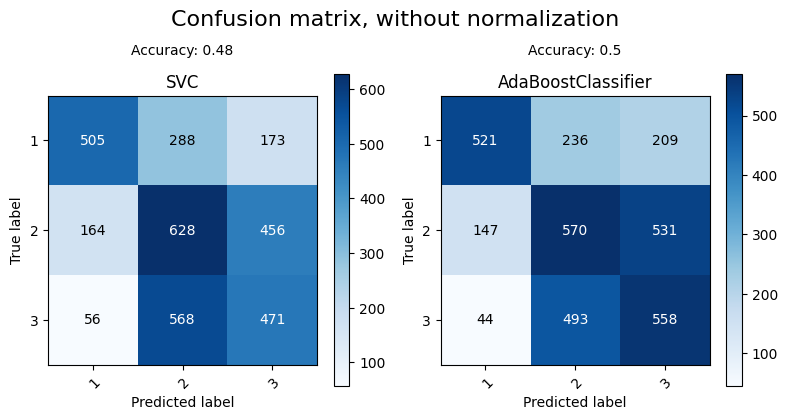

In [166]:
# Creamos el contenedor para representar los resultados
fig, ax = plt.subplots(nrows=1, ncols = len(model_names), figsize = (4*len(model_names),4))

# Representamos la matriz de confusión para cada modelo asignando los parámetros
for idx, model in enumerate(models_to_show):

  # Transformamos variables categóricas a valores numéricos/enteros
  y_model_array = transform_to_categorical_array(models_to_show[idx][3])

  # Creamos este array de numpy porque es el parámetro con las clases que espera la función
  classes = np.array(target_categories)
  plot_confusion_matrix(ytest_df[target_field],
                        y_model_array,
                        classes=classes,
                        normalize=False,
                        title=f'Accuracy: {str(round(model[2],2))}',
                        titleSup=model_names[idx],
                        fig=fig,
                        ax=ax[idx%len(model_names)] if len(model_names) > 1 else ax)


## Matriz de confusión normalizada

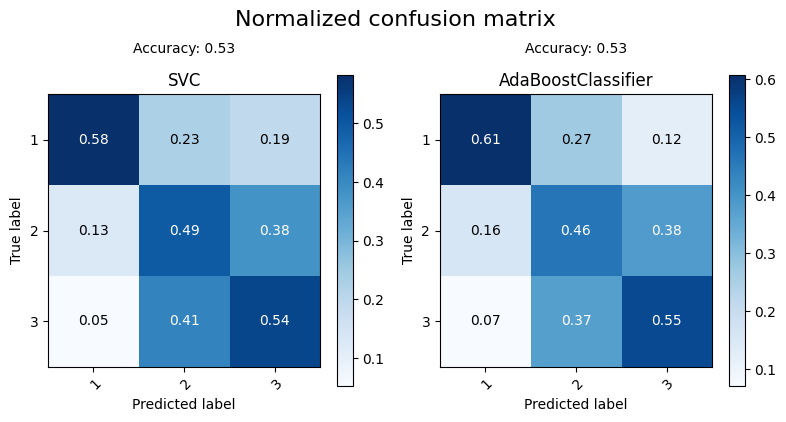

In [ ]:
# Creamos el contenedor para representar los resultados normalizados
fig, ax = plt.subplots(nrows=1, ncols = len(model_names), figsize = (4*len(model_names),4))

# Representamos la matriz de confusión normalizada para cada modelo asignando los parámetros
for idx, model in enumerate(models_to_show):

  y_model_array = transform_to_categorical_array(models_to_show[idx][3])

  # Creamos este array de numpy porque es el parámetro con las clases que espera la función
  classes = np.array(target_categories)
  plot_confusion_matrix(ytest_df[target_field],
                        y_model_array,
                        classes=classes,
                        normalize=True,
                        title=f'Accuracy: {str(round(model[2],2))}',
                        titleSup=model_names[idx],
                        fig=fig,
                        ax=ax[idx%len(model_names)] if len(model_names) > 1 else ax)

## Plot comparativo

Como este problema de clasificación tiene un conjunto de categoría que corresponden con datos enteros consecutivos, es interesante aplicar un plot de igual modo que se usa en un problema de regresión para obsevar el error.

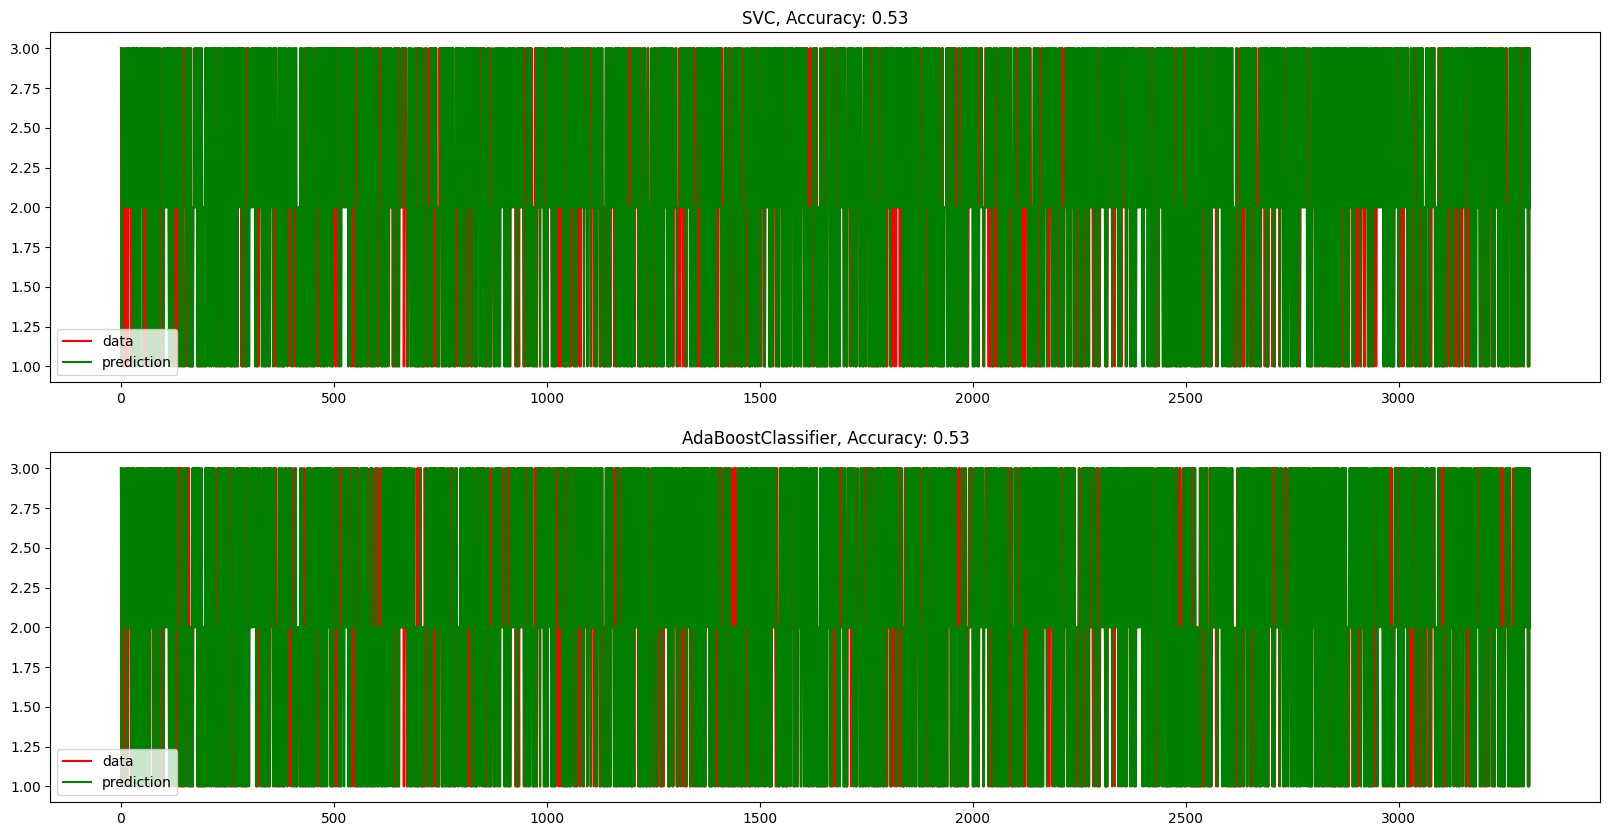

In [ ]:
# Creamos el contenedor para representar los resultados
fig, ax = plt.subplots(nrows = len(model_names), ncols = 1, figsize = (20, 5*len(model_names)))

# Representamos la matriz de confusión para cada modelo asignando los parámetros
for idx, model in enumerate(models_to_show):

  # En la variable(array) xx guarda los índices de las muestras del conjunto de datos de test
  xx = np.arange(len(ytest))
  ax_n=ax[idx%len(model_names)] if len(model_names) > 1 else ax
  ax_n.plot(xx, ytest, c='r', label='data')
  ax_n.plot(xx, model[3], c='g', label='prediction')
  ax_n.legend()
  ax_n.set_title(f'{model_names[idx]}, Accuracy: {str(round(model[2],2))}')

## Error absoluto y MAE

De igual forma, al ser las categorías valores progresivos podemos representar el error absoluto que se comete al asignar una categoría e incluso hallar la media de los errores.

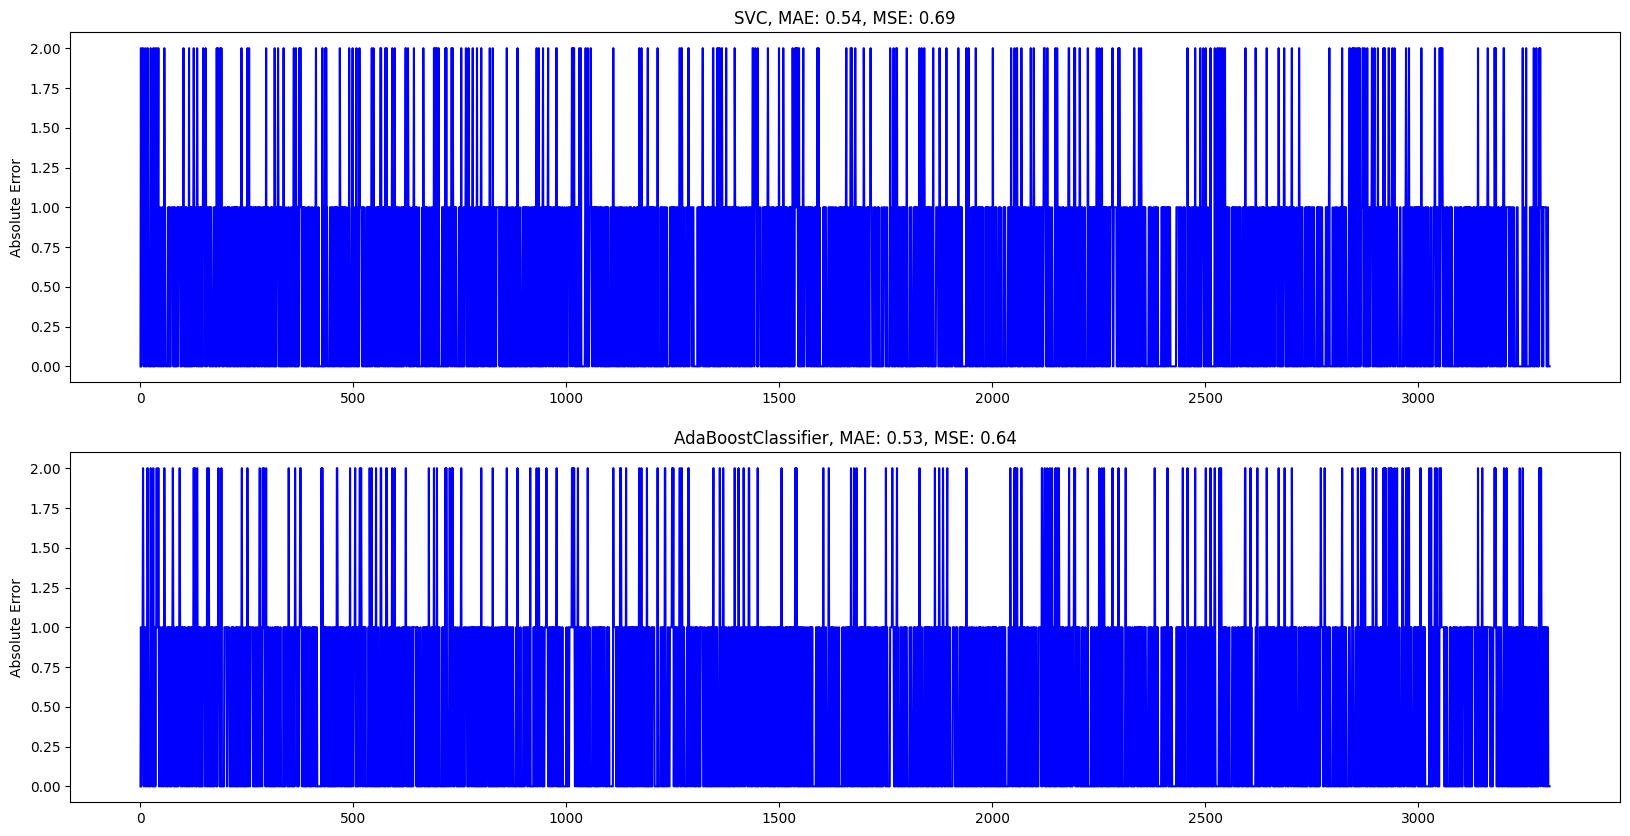

In [ ]:
# Creamos el contenedor para representar los resultados
fig, ax = plt.subplots(nrows = len(model_names), ncols = 1, figsize = (20, 5*len(model_names)))

# Representamos la matriz de confusión para cada modelo asignando los parámetros
for idx, model in enumerate(models_to_show):

  # En la variable(array) xx guarda los índices de las muestras del conjunto de datos de test
  xx = np.arange(len(ytest))
  ax_n=ax[idx%len(model_names)] if len(model_names) > 1 else ax
  ax_n.plot(xx, abs(ytest-model[3]), c='b', label='error')
  ax_n.set_ylabel("Absolute Error")
  ax_n.set_title(f'{model_names[idx]}, MAE: {str(round(np.mean(abs(ytest-model[3])),2))}, MSE: {str(round(np.mean(np.square(ytest-model[3])),2))}')

# Predicción del test

## Procesado del dataset

Se realiza el procesado de las columnas que se hizo con el dataset de entrenamiento.

In [167]:
df_test

has_superstructure_mud_mortar_stone  area_percentage  \
0                                        1             0.07   
1                                        1             0.13   
2                                        1             0.03   
3                                        0             0.20   
4                                        1             0.08   
...                                    ...              ...   
86863                                    1             0.21   
86864                                    1             0.05   
86865                                    1             0.02   
86866                                    1             0.09   
86867                                    0             0.11   

       ground_floor_type  has_superstructure_cement_mortar_brick  age  \
0                   0.50                                       0 0.20   
1                   0.50                                       0 0.25   
2                   0.50                                       0 0.05   
3                   0.25                                       1 0.00   
4                   0.50                                       0 0.15   
...                  ...                                     ...  ...   
86863               0.50                                       0 0.69   
86864               0.50                                       0 0.25   
86865               0.50                                       0 0.50   
86866               0.50                                       0 0.05   
86867               0.25                                       1 0.10   

       roof_type  has_secondary_use  has_superstructure_timber  
0           0.00                  0                          0  
1           0.00                  1                          0  
2           0.00                  0                          0  
3           0.50                  1                          0  
4           1.00                  0                          0  
...          ...                ...                        ...  
86863       1.00                  1                          1  
86864       0.00                  0                          0  
86865       0.00                  0                          1  
86866       0.00                  0                          0  
86867       1.00                  0                          0  

[86868 rows x 8 columns]

### Se importa el modelo y se predicen los datos de test.

Se importa el modelo SVC, se predicen los datos de test y se exporta el fichero CSV que se subirá para la competición de Driven Data.

In [175]:
# Se importa el modelo
imported_model = joblib.load('SVC.pkl')

# Predicción de los datos de test con el modelo importado
y_pred = imported_model.predict(df_test).astype(int)

In [176]:
submission_data = pd.merge(df_test_features[['building_id']], pd.DataFrame(y_pred, columns=[target_field]), left_index=True, right_index=True)
submission_data

building_id  damage_grade
0           300051             3
1            99355             2
2           890251             2
3           745817             1
4           421793             2
...            ...           ...
86863       310028             2
86864       663567             3
86865      1049160             3
86866       442785             2
86867       501372             2

[86868 rows x 2 columns]

In [178]:
submission_data.to_csv("Submission_SVC.csv", index=False)

Repetimos el proceso para el AdaBoostClasiffier

In [171]:
# Se importa el modelo
imported_model = joblib.load('AdaBoostClassifier.pkl')

# Predicción de los datos de test con el modelo importado
y_pred = imported_model.predict(df_test).astype(int)

In [172]:
submission_data = pd.merge(df_test_features[['building_id']], pd.DataFrame(y_pred, columns=[target_field]), left_index=True, right_index=True)
submission_data

building_id  damage_grade
0           300051             3
1            99355             2
2           890251             3
3           745817             1
4           421793             3
...            ...           ...
86863       310028             3
86864       663567             3
86865      1049160             3
86866       442785             2
86867       501372             1

[86868 rows x 2 columns]

In [174]:
submission_data.to_csv("Submission_AdaBoostClassifier.csv", index=False)